# Exploratory Data Analysis (EDA) and Initial Visualization

## Configuration

In [23]:
import os
import pandas as pd
import plotly.express as px
import plotly.figure_factory as ff

from IPython.display import Image

from ts_clf_event.data_handler.utils import analyze_sampling_rate

In [24]:
project_dir = '/Users/georgebatsis/Documents/Projects/ts_clf_event'
data_path = os.path.join(project_dir,"data/test_dataframe.csv")

## Initial inspection

This section presents the initial assessment of the dataset, covering the structure, data types, basic statistics, and sampling rate analysis.

In [25]:
# Read the CSV file
data = pd.read_csv(data_path, index_col=0)
data['datetime'] = pd.to_datetime(data['datetime'])

# Print the first 5 rows of the DataFrame
data.head()

,start_value,value,speed,level,frequency,status,process,datetime,provider
0,0.0,30.36,0.0,1.0,0.0,0.0,0,2020-06-01 00:00:00,2
1,0.0,26.82,0.0,0.0,0.0,-1.0,0,2020-06-01 00:00:21,1
2,0.0,29.72,0.0,1.0,0.0,0.0,0,2020-06-01 00:01:01,2
3,0.0,27.57,0.0,0.0,0.0,-1.0,0,2020-06-01 00:01:22,1
4,0.0,30.79,0.0,1.0,0.0,0.0,0,2020-06-01 00:02:01,2


In [26]:
# Check data types and missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86936 entries, 0 to 86935
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   start_value  86936 non-null  float64       
 1   value        86936 non-null  float64       
 2   speed        86936 non-null  float64       
 3   level        86936 non-null  float64       
 4   frequency    86936 non-null  float64       
 5   status       86936 non-null  float64       
 6   process      86936 non-null  int64         
 7   datetime     86936 non-null  datetime64[ns]
 8   provider     86936 non-null  int64         
dtypes: datetime64[ns](1), float64(6), int64(2)
memory usage: 6.6 MB


In [27]:
# Basic descriptive statistics
data.describe()

,start_value,value,speed,level,frequency,status,process,datetime,provider
count,86936.000000,86936.000000,86936.000000,86936.000000,86936.000000,86936.000000,86936.000000,86936,86936.000000
mean,0.002197,33.233050,1.495583,1.743592,5.892611,-0.469955,0.048760,2020-06-16 08:35:45.739348480,1.505901
min,0.000000,22.560000,0.000000,0.000000,0.000000,-1.000000,0.000000,2020-06-01 00:00:00,1.000000
25%,0.000000,27.860000,0.000000,0.000000,0.000000,-1.000000,0.000000,2020-06-08 15:12:53.500000,1.000000
50%,0.000000,30.120000,0.000000,1.000000,0.000000,0.000000,0.000000,2020-06-16 06:25:01,2.000000
75%,0.000000,31.800000,0.000000,1.000000,0.000000,0.000000,0.000000,2020-06-23 21:39:37.750000128,2.000000
max,1.000000,82.730000,100.000000,51.950000,100.000000,1.000000,1.000000,2020-07-01 23:59:37,2.000000
std,0.046821,11.694368,11.507638,6.510955,21.480605,0.545334,0.215367,NaN,0.499968


In [28]:
# Analyze sampling rate
sampling_rate_stats = analyze_sampling_rate(data.copy(),"provider")
sampling_rate_stats

{1: {'count': 42954.0,
  'mean': 62.35365740094054,
  'std': 385.75501052415814,
  'min': 1.0,
  '25%': 60.0,
  '50%': 60.0,
  '75%': 61.0,
  'max': 80009.0,
  'mode': 60.0},
 2: {'count': 43980.0,
  'mean': 60.89988631195998,
  'std': 0.911363135758107,
  'min': 60.0,
  '25%': 61.0,
  '50%': 61.0,
  '75%': 61.0,
  'max': 76.0,
  'mode': 61.0}}

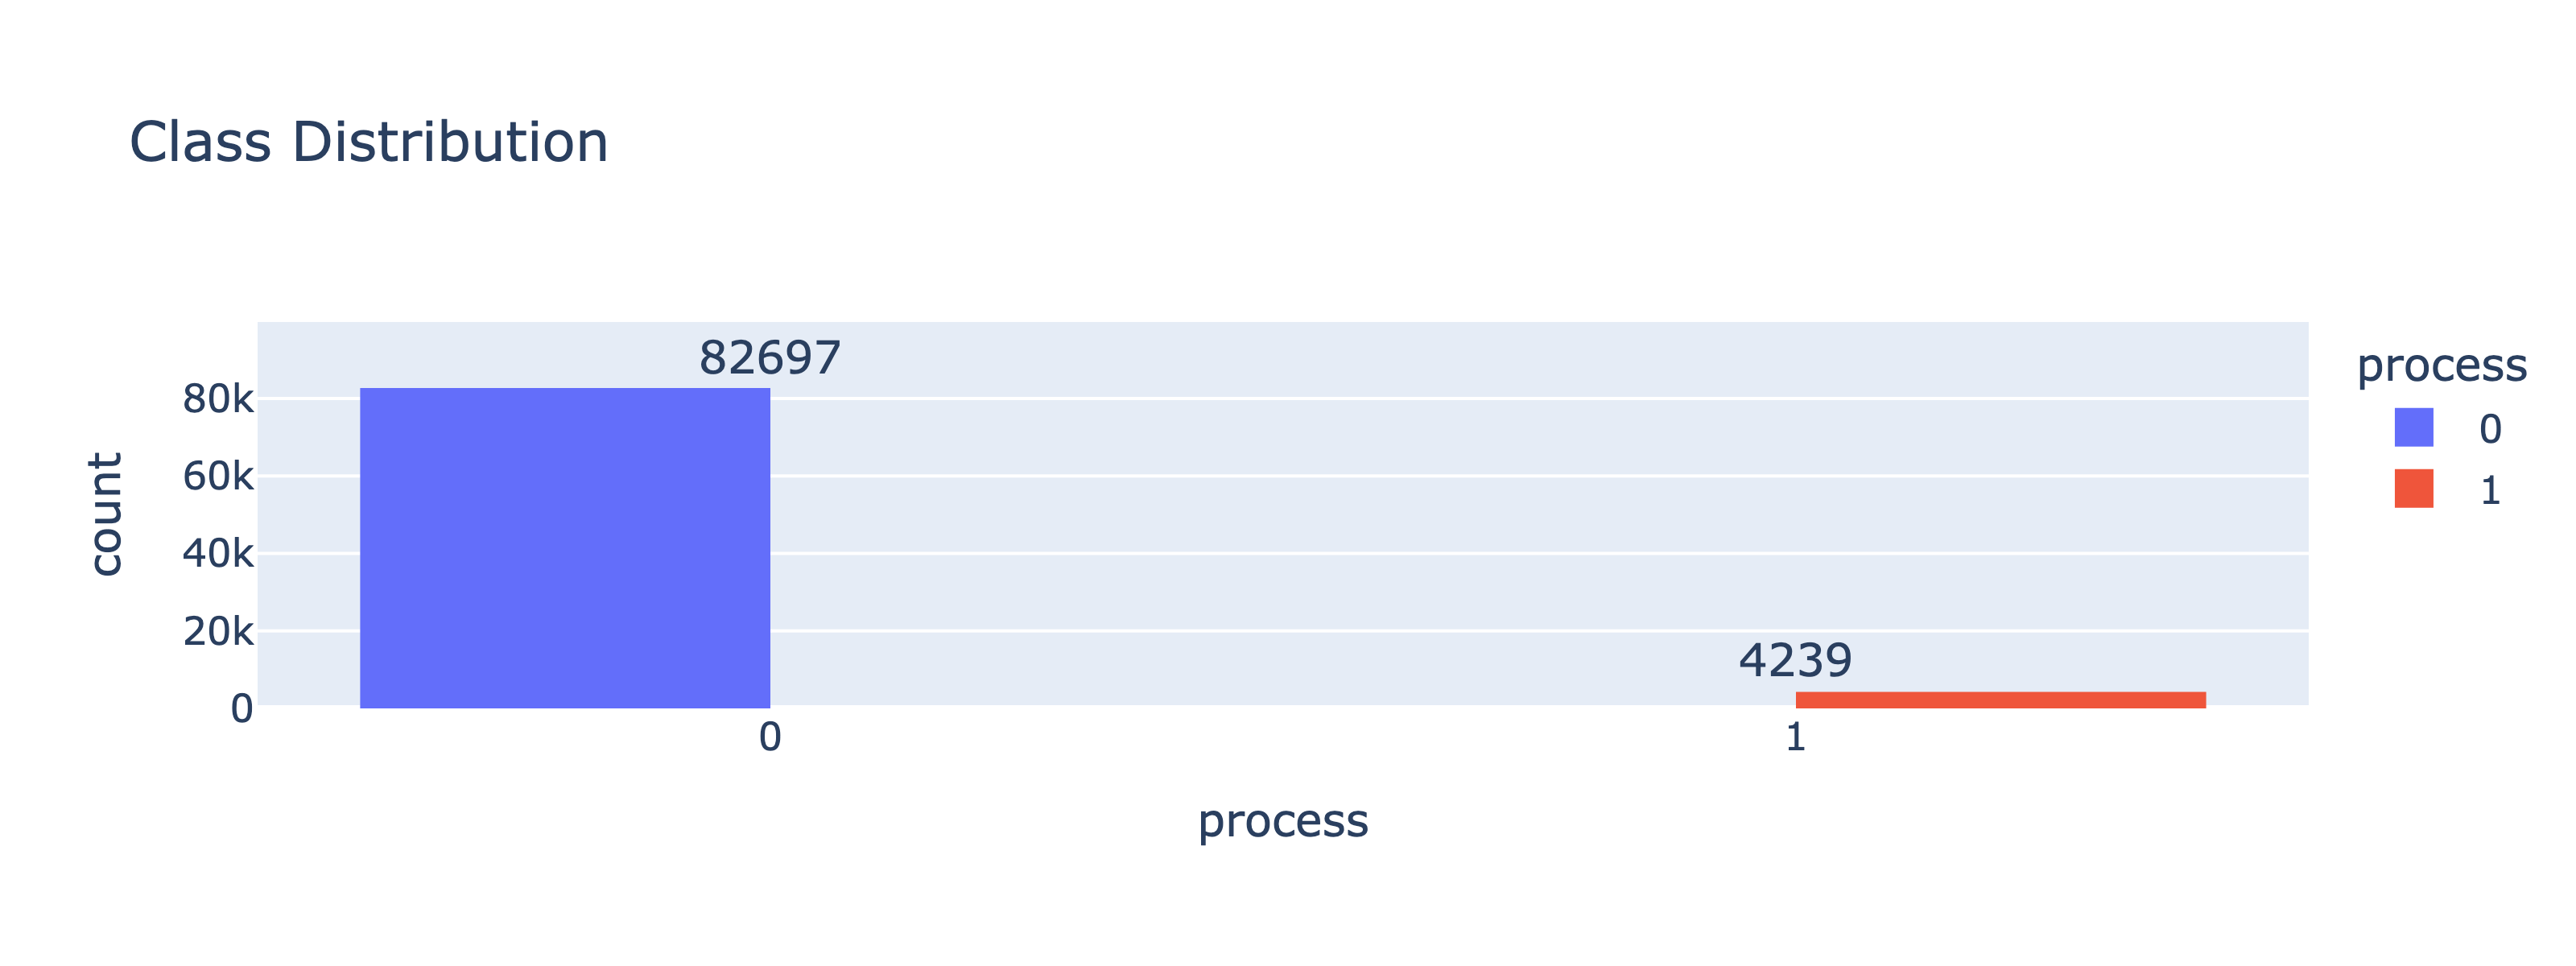

In [29]:
# Histogram for class distribution
fig = px.histogram(data, x='process', color='process', barmode='group',
                   title='Class Distribution')

fig.update_layout(xaxis=dict(tickmode='linear'))

# Add text annotations for the counts
for i, count in enumerate(data['process'].value_counts().sort_index()):
    fig.add_annotation(
        x=i,
        y=count,
        text=str(count),
        showarrow=False,
        font=dict(size=14),
        yref="y", 
        yshift=10,
        xref="x",
        xshift=0)

Image(fig.to_image(format="png", width=800, height=300, scale=4))

### Analysis

**1. Data Overview**

The dataset comprises **86,936 entries** and **9 columns**. Each entry represents a measurement taken at a specific point in time. The columns are as follows:

*   **start\_value:** (float64) Binary signal indicating the start of a process.
*   **value:** (float64) Temperature inside the vessel (°C).
*   **speed:** (float64) Speed of the motor operating the vessel (RPM).
*   **level:** (float64) Liquid level in the vessel (mm).
*   **frequency:** (float64) Frequency percentage of the pump.
*   **status:** (float64) Status of a valve in the vessel (-1, 0, or 1).
*   **process:** (int64) Binary indicator of process activity (1 = active, 0 = inactive/other).
*   **datetime:** (datetime64\[ns]) Date and time of the measurement.
*   **provider:** (int64) Unique ID of the data provider (1 or 2).


The data types are appropriate for each column. Importantly, there are **no missing values** in the dataset.

**2. Descriptive Statistics**

*   The `start_value` is rarely 1 (mean ≈ 0.002), suggesting that the start of a process is an infrequent event.
*   `value` (temperature) has a relatively wide range (22.56°C to 82.73°C), indicating significant temperature variations.
*   `speed`, `level` and `frequency` also exhibit a large variability, with maximum values reaching 100.
*   `status` is most frequently -1, suggesting that the valve is often in a particular state (needs further investigation in the context of the process).
*   The `process` variable, our target, has a mean of approximately 0.05, indicating that the process is active only about 5% of the time. This suggests a class imbalance, as observed in the class distribution plot.

**3. Sampling Rate Analysis**

The dataset contains data from two providers. The sampling rate (time interval between consecutive measurements) was analyzed for each provider. The results are summarized below:

*   **Provider 1** exhibits more variability in its sampling rate. The mean is around 62 seconds, but the standard deviation is large (around 386). Also, there are a few outliers with very large time difference between two consecutive records. The mode of 60 seconds suggests that while there's variability, the most common sampling interval is still around 60 seconds.
*   **Provider 2** has a more consistent sampling rate, with a mean of approximately 61 seconds and a very small standard deviation. The mode is also 61, indicating that the majority of measurements are taken 61 seconds apart.

## Features Visualization

### Utility functions

In [30]:
# Function to plot time series for each provider and process status
def plot_time_series(feature):
    fig = px.line(data, x='datetime', y=feature, color='provider', facet_col='process',
                  title=f'Time Series of {feature} by Provider and Process Status')
    fig.update_xaxes(rangeslider_visible=True)
    return fig

# Histograms for key features
def plot_histogram(feature):
    fig = px.histogram(data, x=feature, color='process', marginal='box',
                       title=f'Distribution of {feature} by Process Status')
    return fig

# Box plots to compare providers
def plot_box_by_provider(feature):
    fig = px.box(data, x='provider', y=feature, color='process',
                 title=f'{feature} Distribution by Provider and Process Status')
    return fig

### Time series plots for key features

This section analyzes the temporal patterns of the key numerical features: value (temperature), level, frequency, and speed. The visualizations show the time series of each feature, segmented by provider and process status (active vs. inactive). Each plot is divided into two facets: one for process=0 (inactive) and one for process=1 (active). The color of the line indicates the provider (blue for provider 1, orange for provider 2).

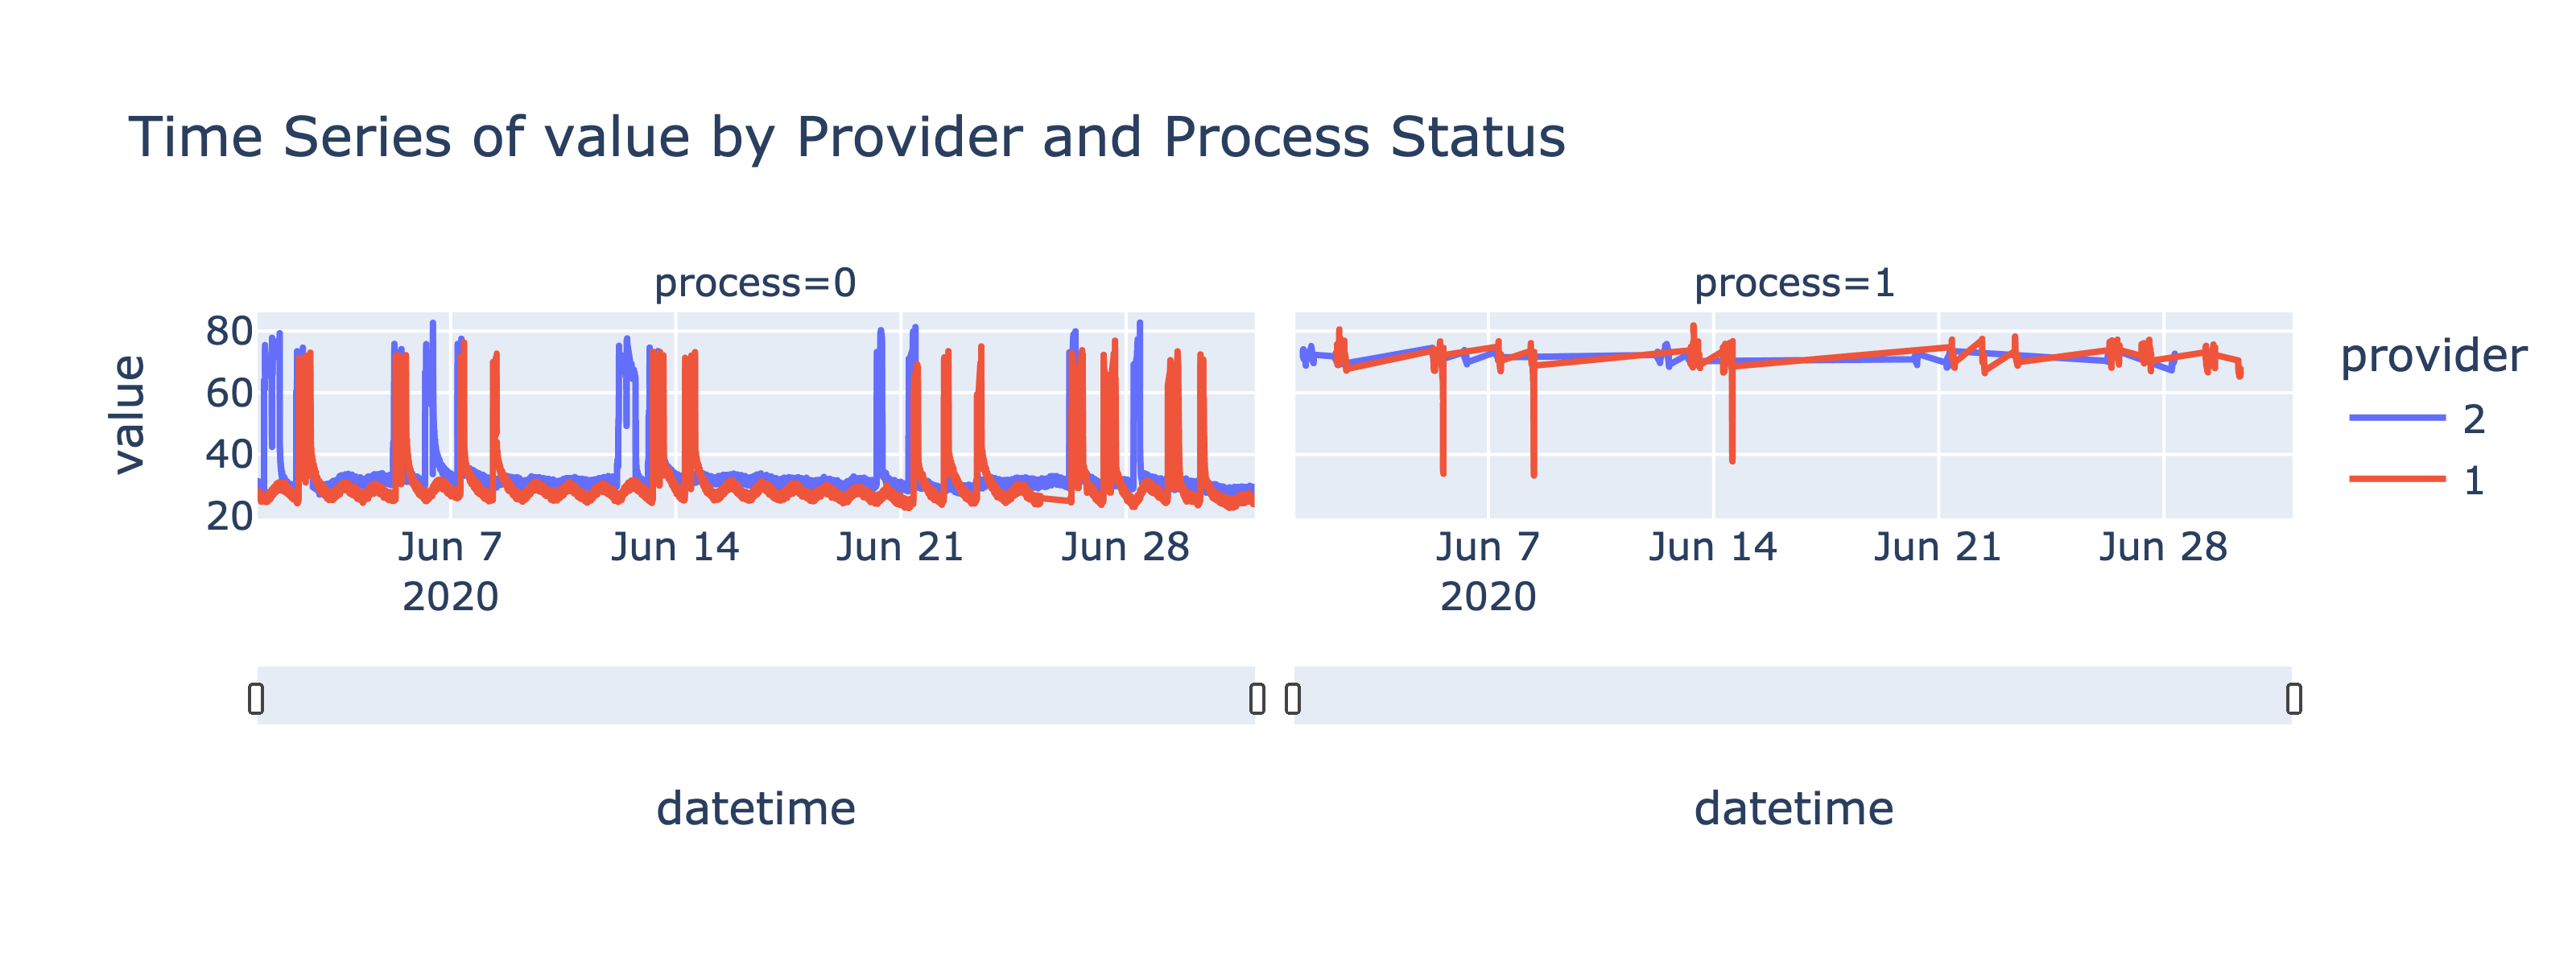

In [31]:
fig = plot_time_series('value')
Image(fig.to_image(format="png", width=800, height=300, scale=4))

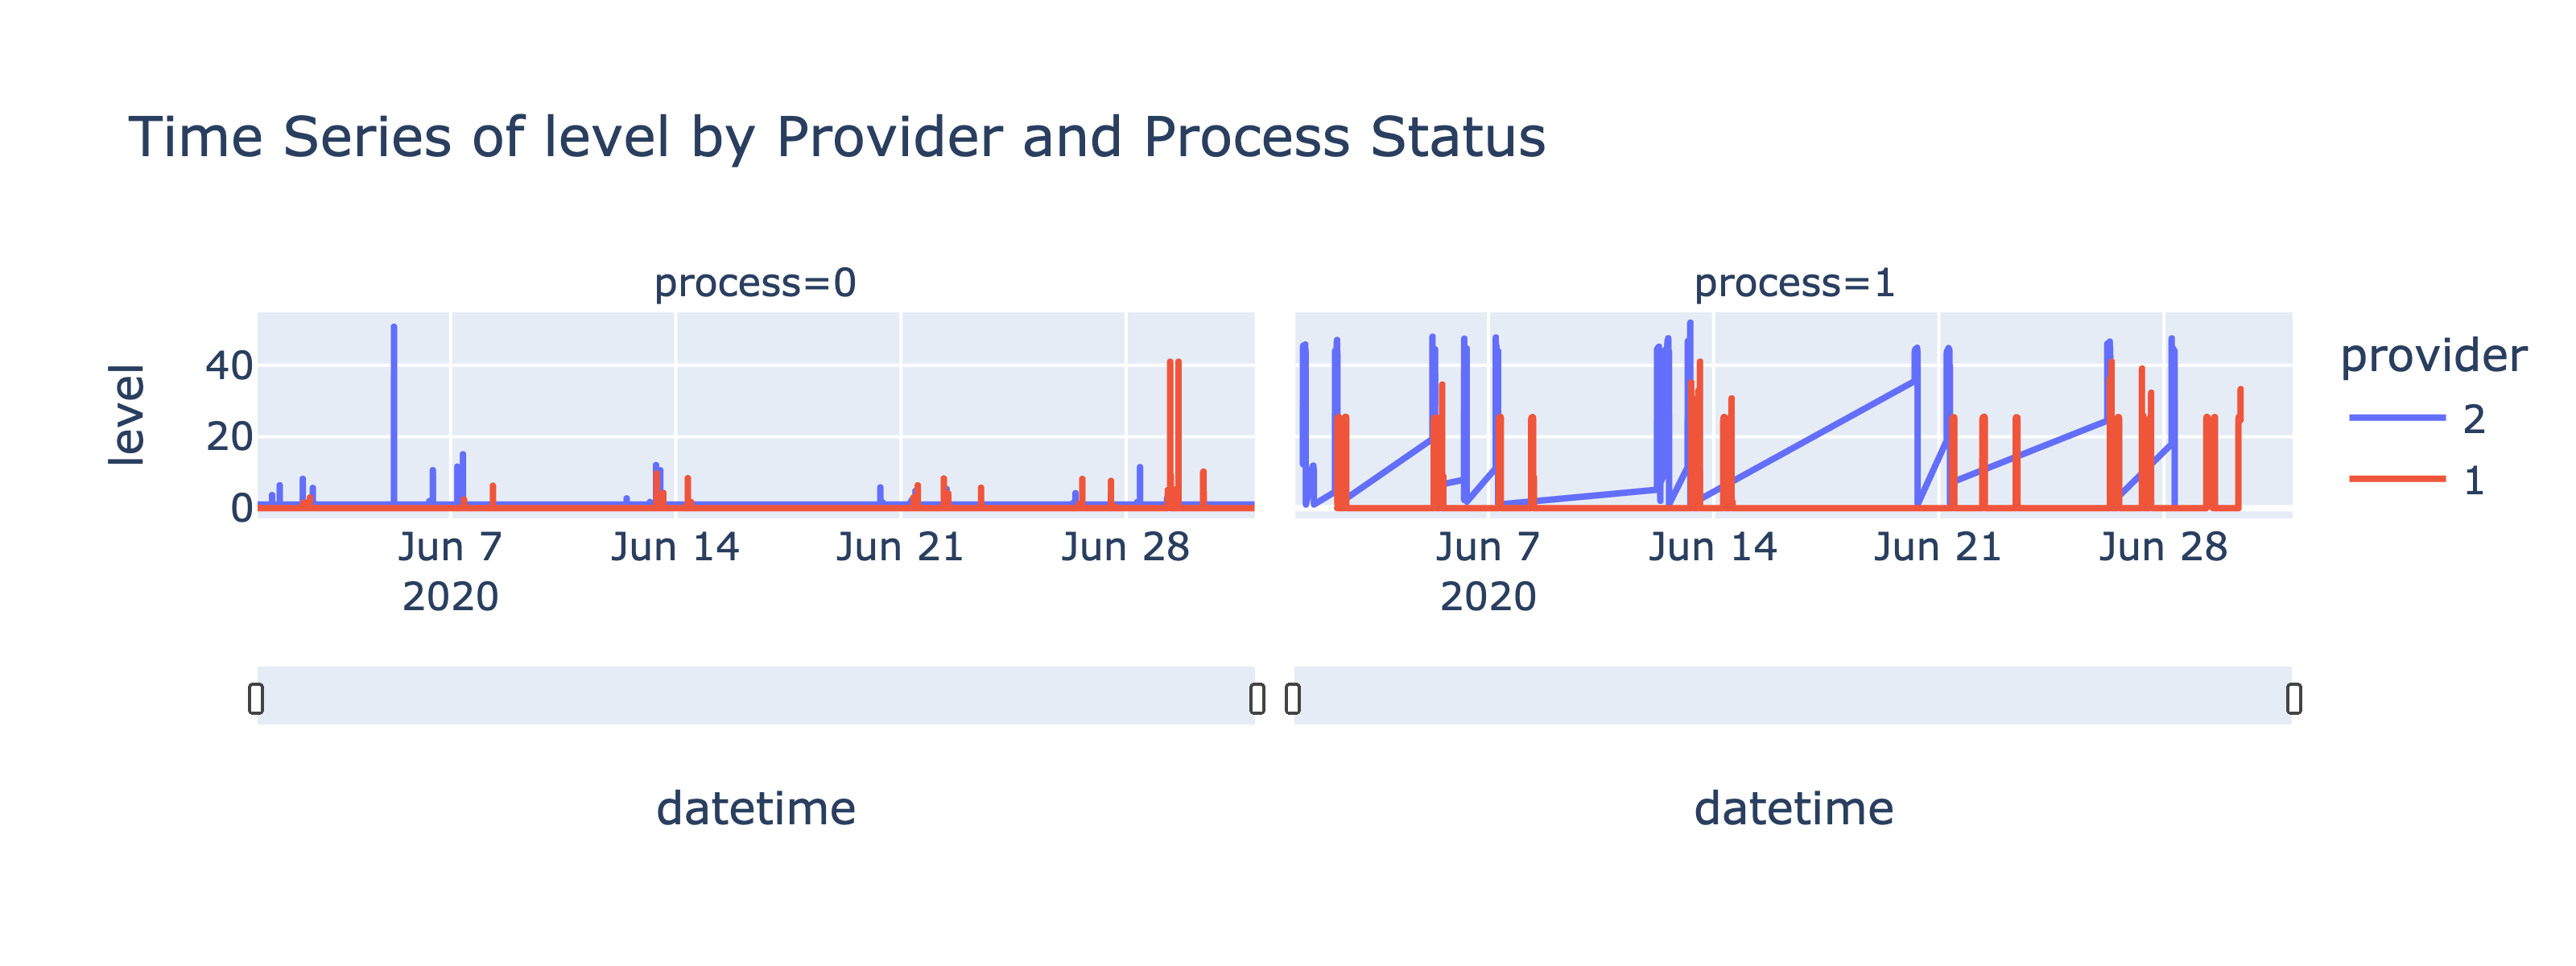

In [32]:
fig = plot_time_series('level')
Image(fig.to_image(format="png", width=800, height=300, scale=4))

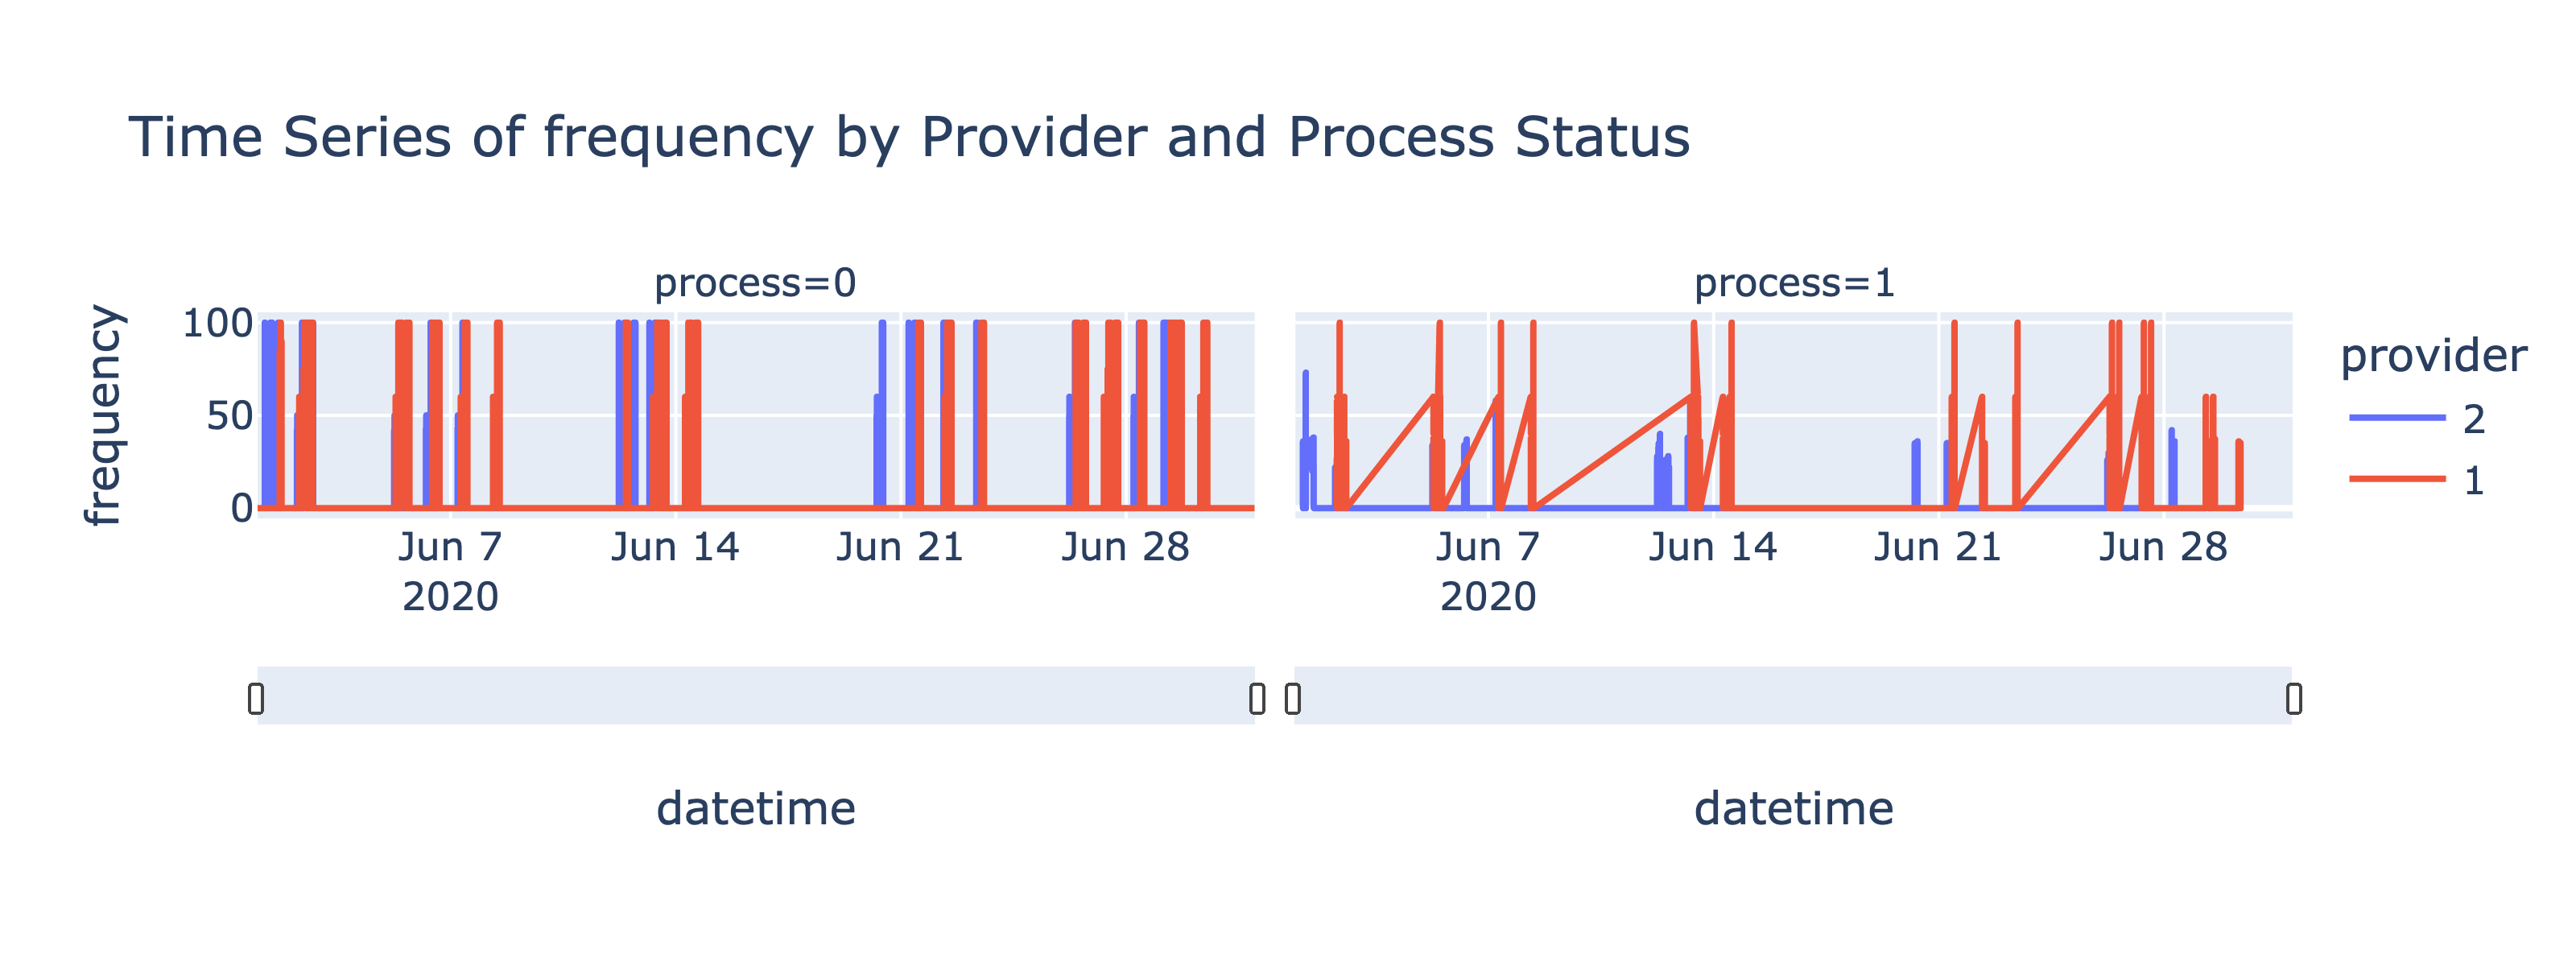

In [33]:
fig = plot_time_series('frequency')
Image(fig.to_image(format="png", width=800, height=300, scale=4))

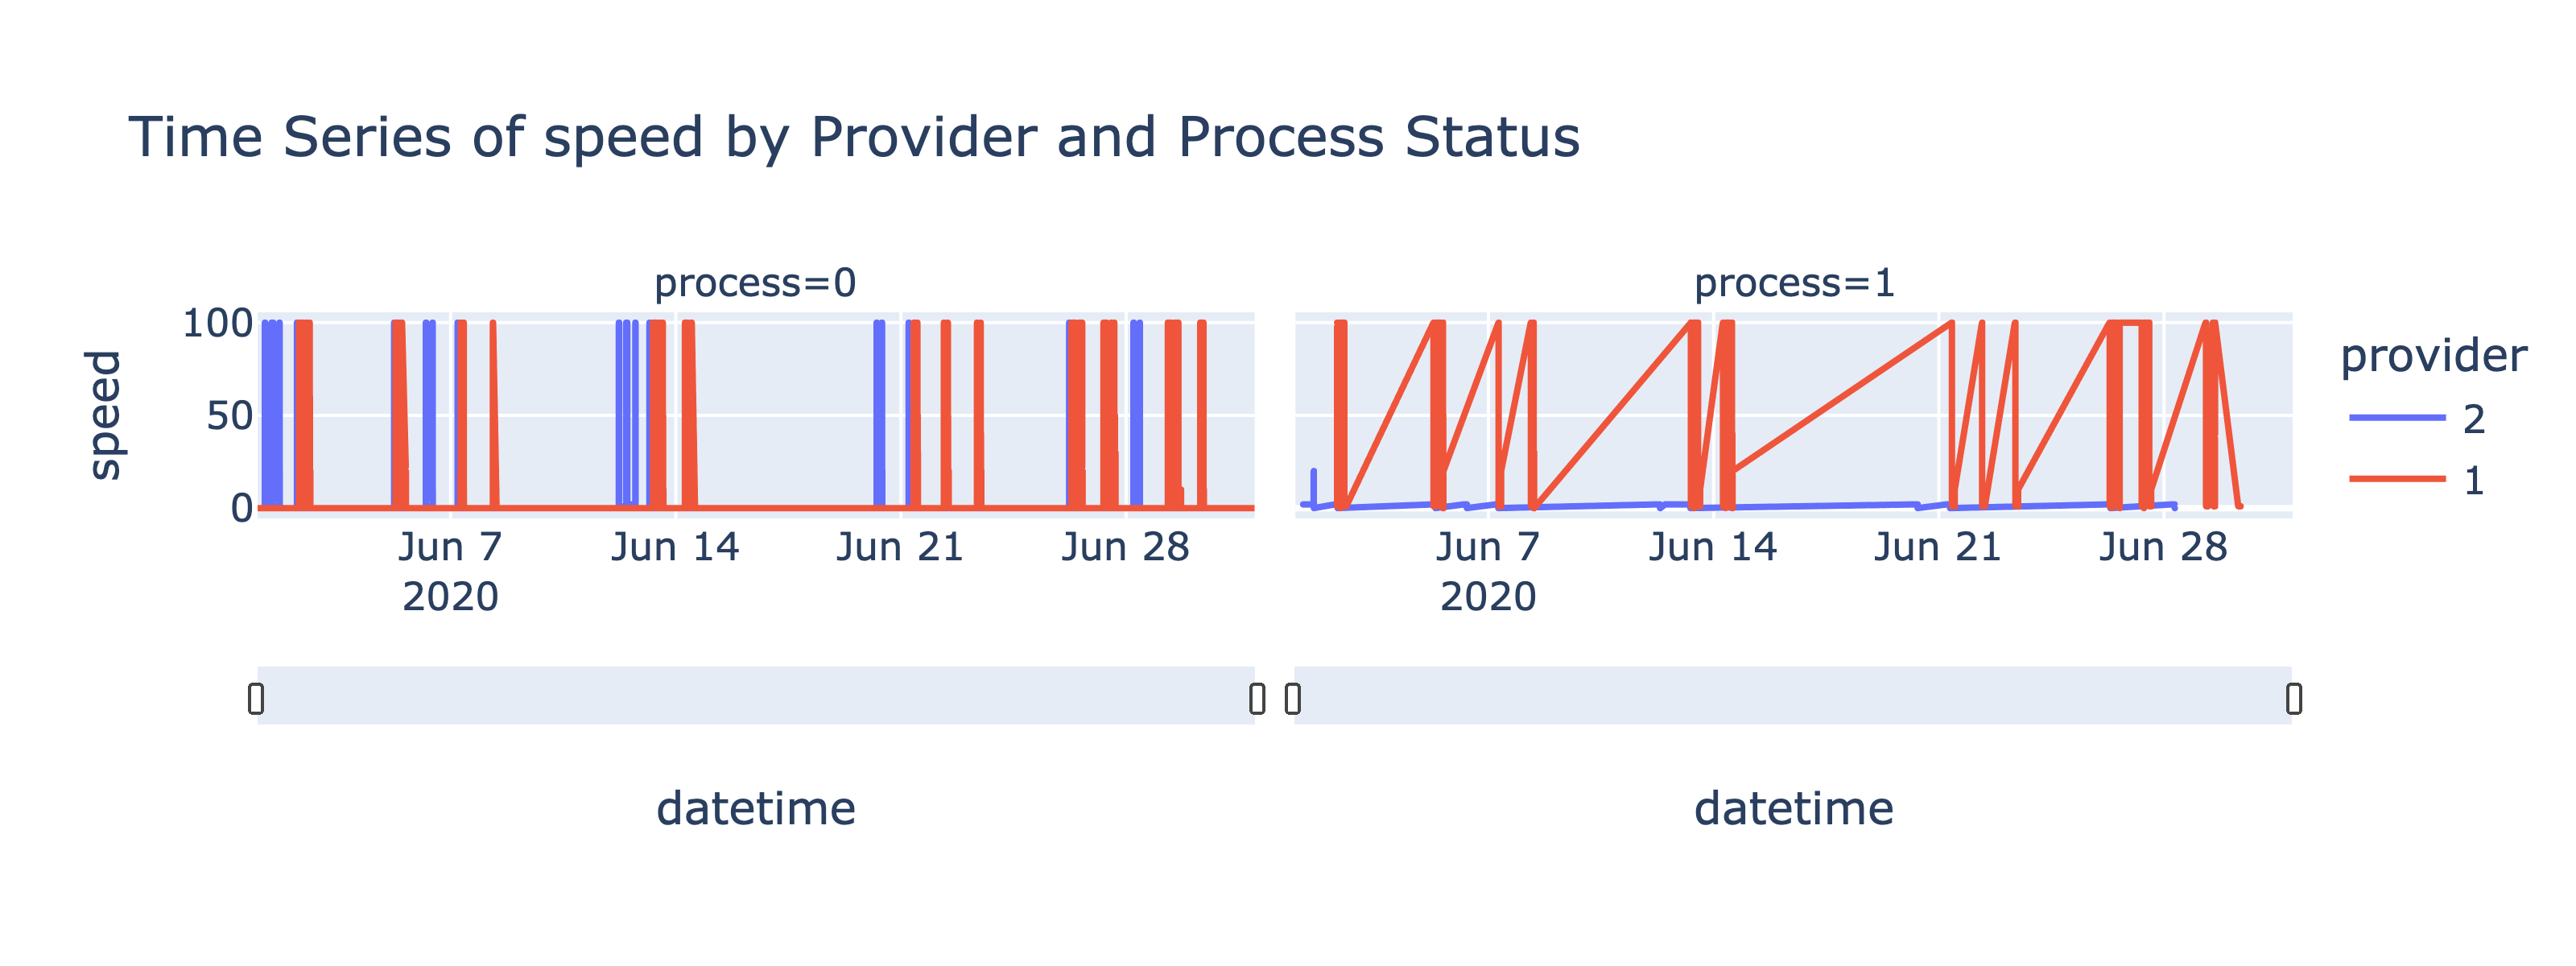

In [34]:
fig = plot_time_series('speed')
Image(fig.to_image(format="png", width=800, height=300, scale=4))

#### Analysis

**1. `value` (Temperature):**

*   **Process = 0 (Inactive):**
    *   Both providers exhibit cyclical patterns, potentially indicating regular operational cycles or external factors influencing temperature.
    *   Provider 1 (blue) shows more pronounced and rapid temperature fluctuations compared to Provider 2 (orange).
    *   The temperature generally oscillates between approximately 25°C and 80°C for both providers.
*   **Process = 1 (Active):**
    *   The temperature remains relatively stable for both providers, hovering around 70°C for Provider 1 and 80°C for Provider 2.
    *   The cyclical patterns observed when the process is inactive are largely absent.
    *   The stable temperature during active periods suggests that the process might involve maintaining a specific temperature range.

**2. `level` (Liquid Level):**

*   **Process = 0 (Inactive):**
    *   Provider 1 shows more frequent and larger spikes in liquid level compared to Provider 2. The level is zero for a great amount of time for both providers.
    *   Provider 2 has a relatively stable level at 0 for most of the time, with occasional spikes.
*   **Process = 1 (Active):**
    *   Both providers show an increase in the number of level fluctuations, but the patterns are irregular.
    *   The liquid level for provider 1 reaches higher peaks compared to provider 2.
    *   The frequent fluctuations suggest that the active process involves dynamic changes in liquid levels.

**3. `frequency` (Pump Frequency):**

*   **Process = 0 (Inactive):**
    *   Both providers exhibit intermittent spikes in frequency, alternating between 0 and periods of activity around 50-100 for Provider 1 and around 50 for Provider 2.
    *   Provider 1 has periods of sustained higher frequency compared to Provider 2.
*   **Process = 1 (Active):**
    *   Both providers show more frequent and sustained periods of pump activity.
    *   Provider 1 still has periods of higher frequency, reaching close to 100, compared to Provider 2 which remains around 50.
    *   The increased activity aligns with the expectation that the pump is more active when the process is running.

**4. `speed` (Motor Speed):**

*   **Process = 0 (Inactive):**
    *   Similar to frequency, both providers show intermittent spikes in speed, alternating between 0 and periods of activity around 50-100 for Provider 1 and around 50 for Provider 2.
    *   Provider 1 has periods of sustained higher speed compared to Provider 2.
*   **Process = 1 (Active):**
    *   The patterns are very similar to the `frequency` patterns. Both providers have more frequent and sustained periods of higher motor speed.
    *   Provider 1's speed reaches close to 100 at times, while Provider 2 remains around 50.
    *   This suggests a strong correlation between motor speed and pump frequency, as expected.


**Overall**

*   **Distinct Patterns for Active vs. Inactive Process:** The time series plots reveal clear differences in the behavior of the features when the process is active versus inactive. This supports the feasibility of using these features to build a classification model.
*   **Provider-Specific Characteristics:** Provider 1 consistently shows more variability and higher peak values in temperature, liquid level, frequency, and speed compared to Provider 2. This suggests that the operating conditions or equipment used by the two providers might be different.

### Histograms & Distributions for key features

This section examines the distributions of the key numerical features (value, level, frequency, and speed) conditioned on the process status (active vs. inactive). This helps us understand how each feature's values differ between the two classes.

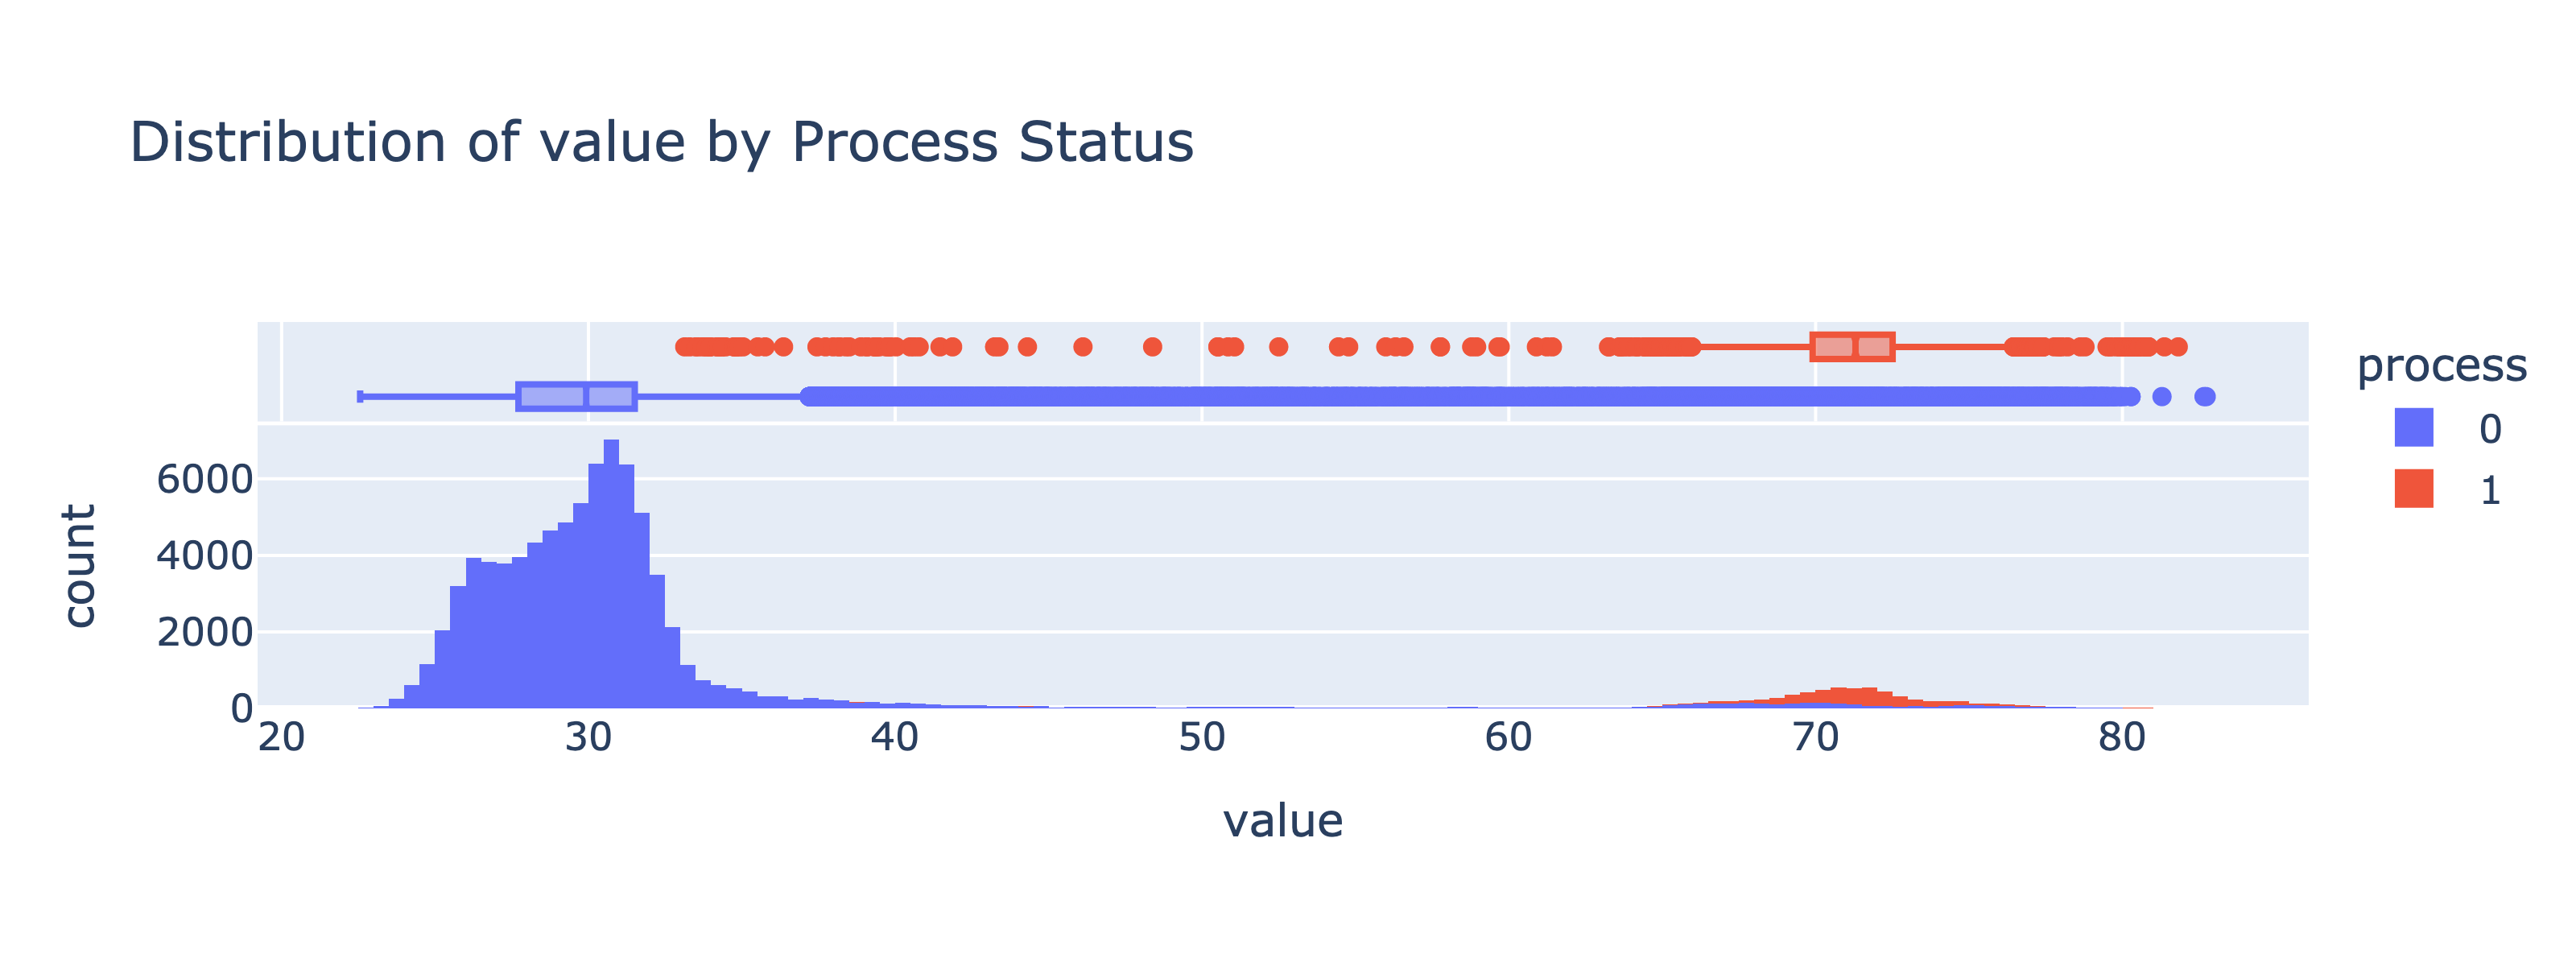

In [35]:
fig = plot_histogram('value')
Image(fig.to_image(format="png", width=800, height=300, scale=4))

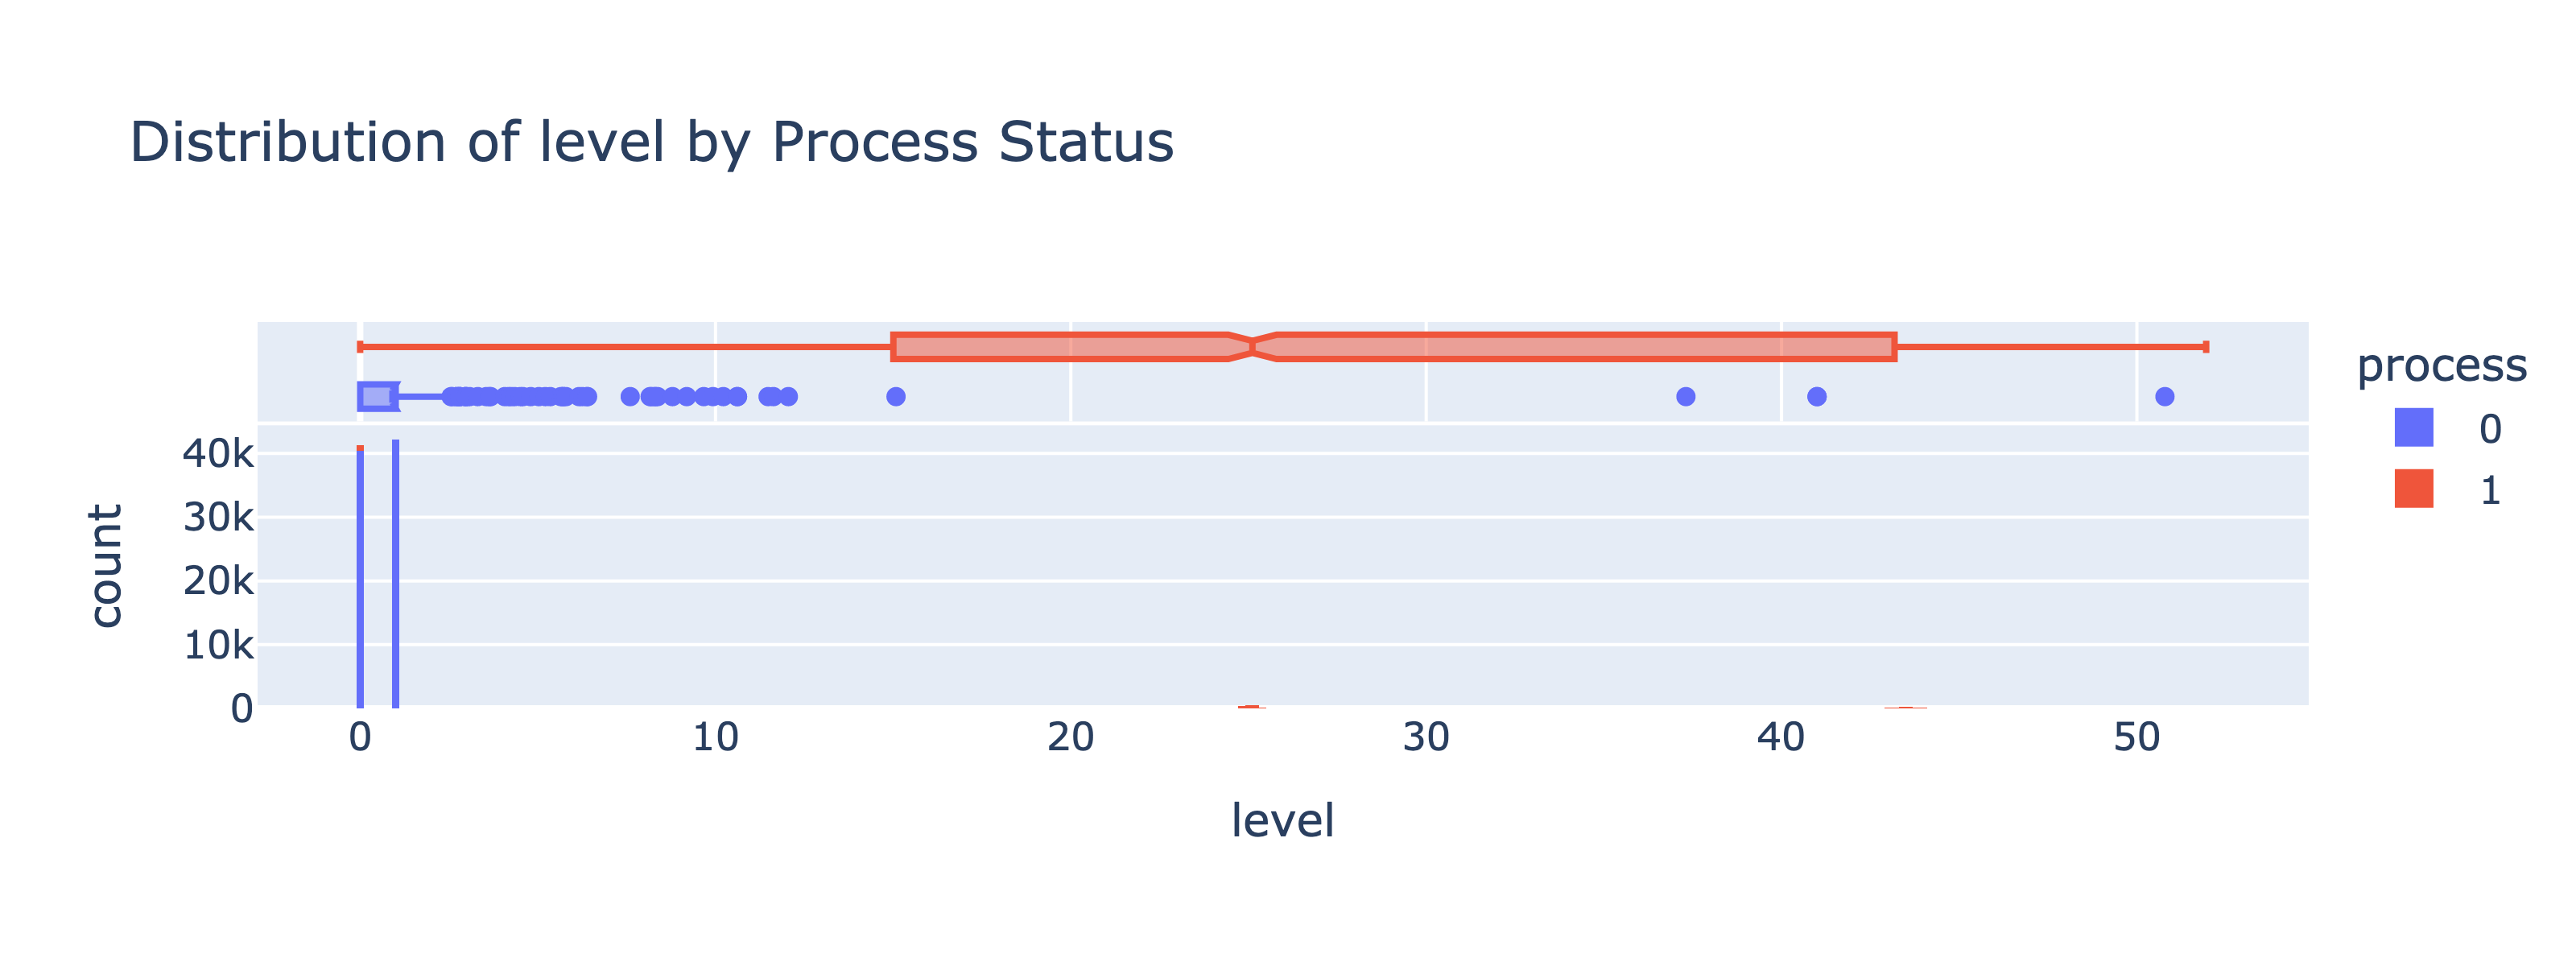

In [36]:
fig = plot_histogram('level')
Image(fig.to_image(format="png", width=800, height=300, scale=4))

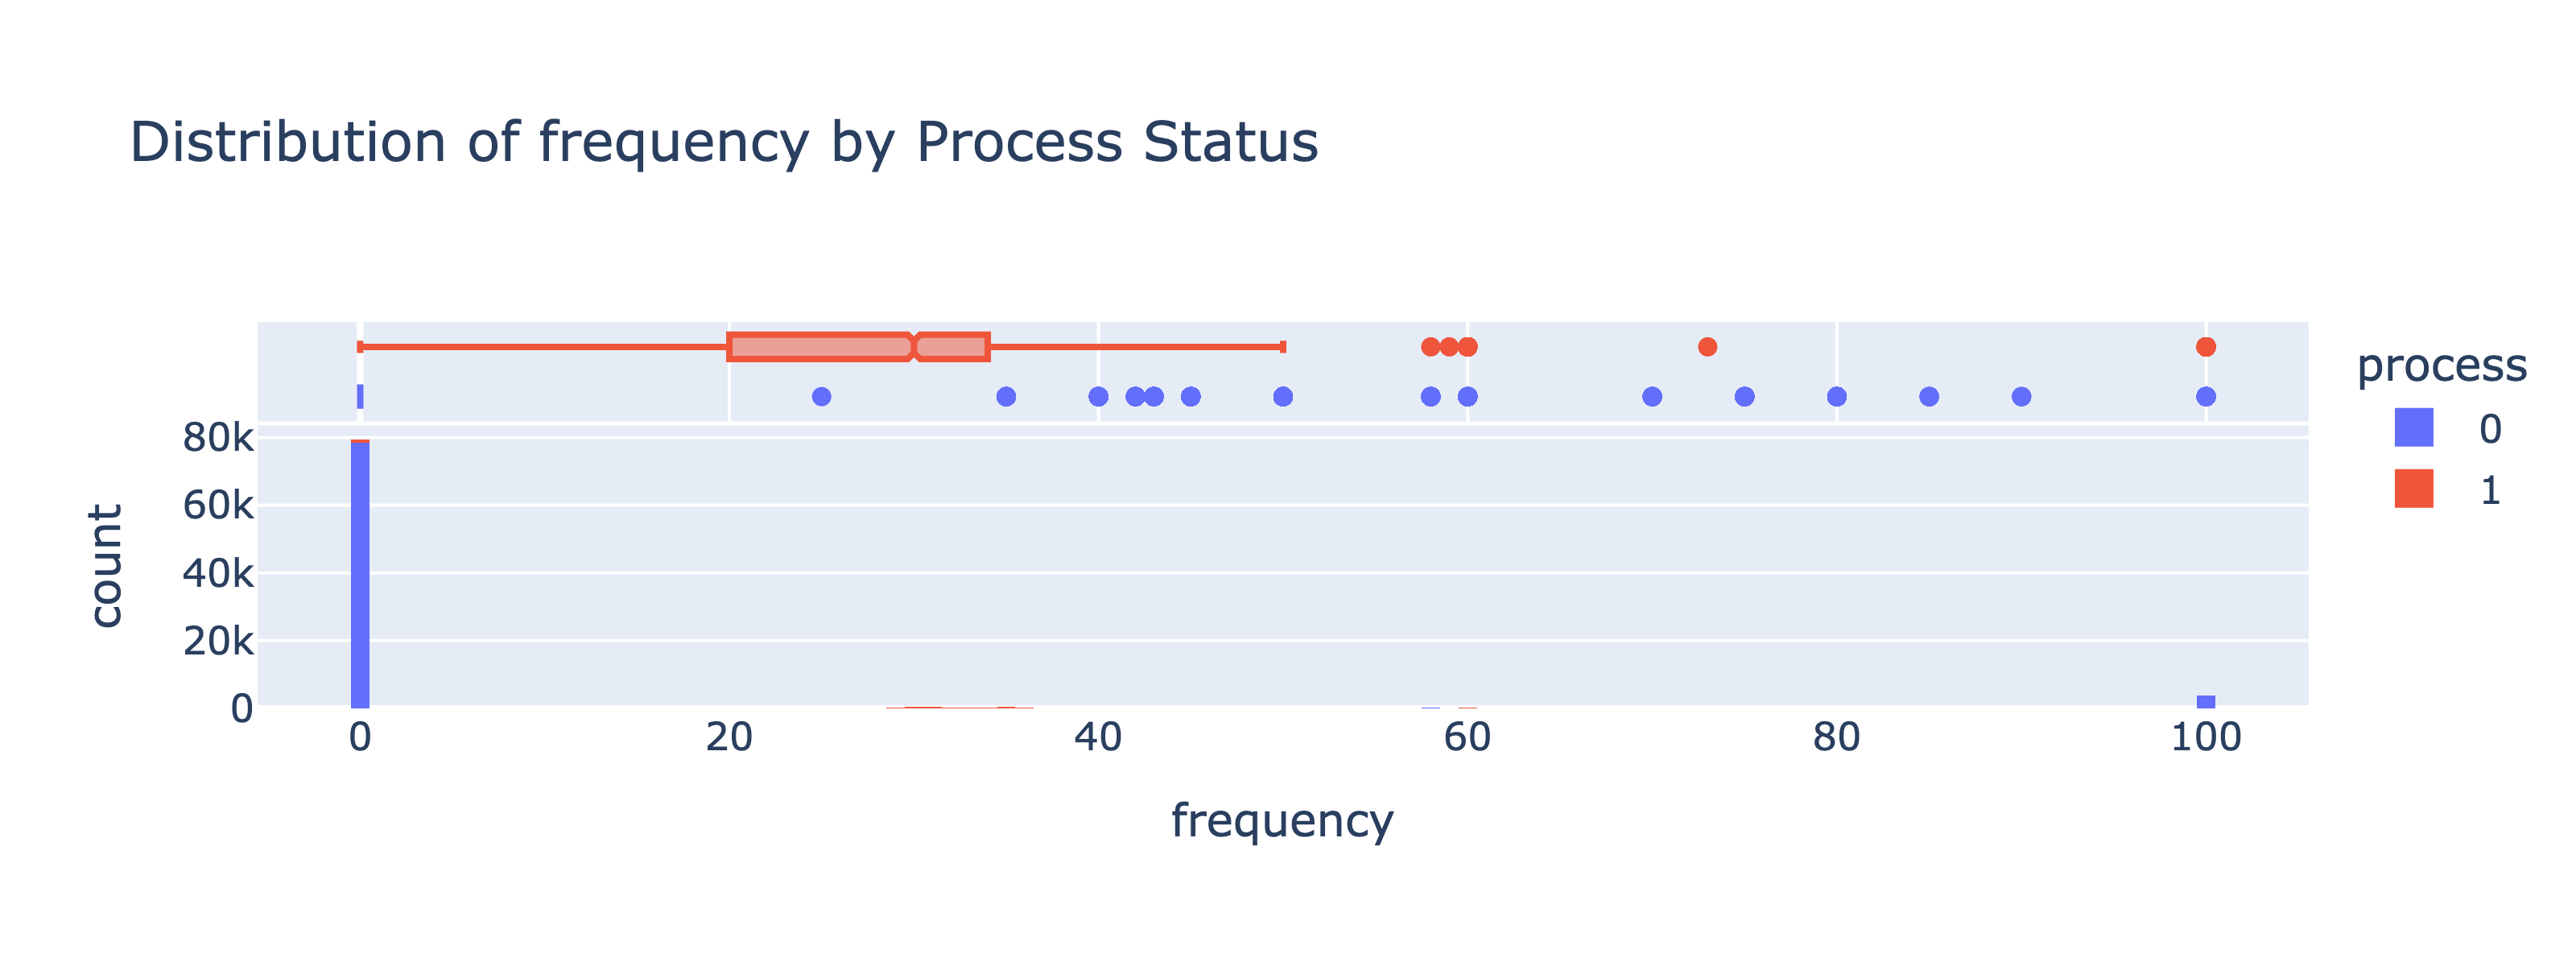

In [37]:
fig = plot_histogram('frequency')
Image(fig.to_image(format="png", width=800, height=300, scale=4))

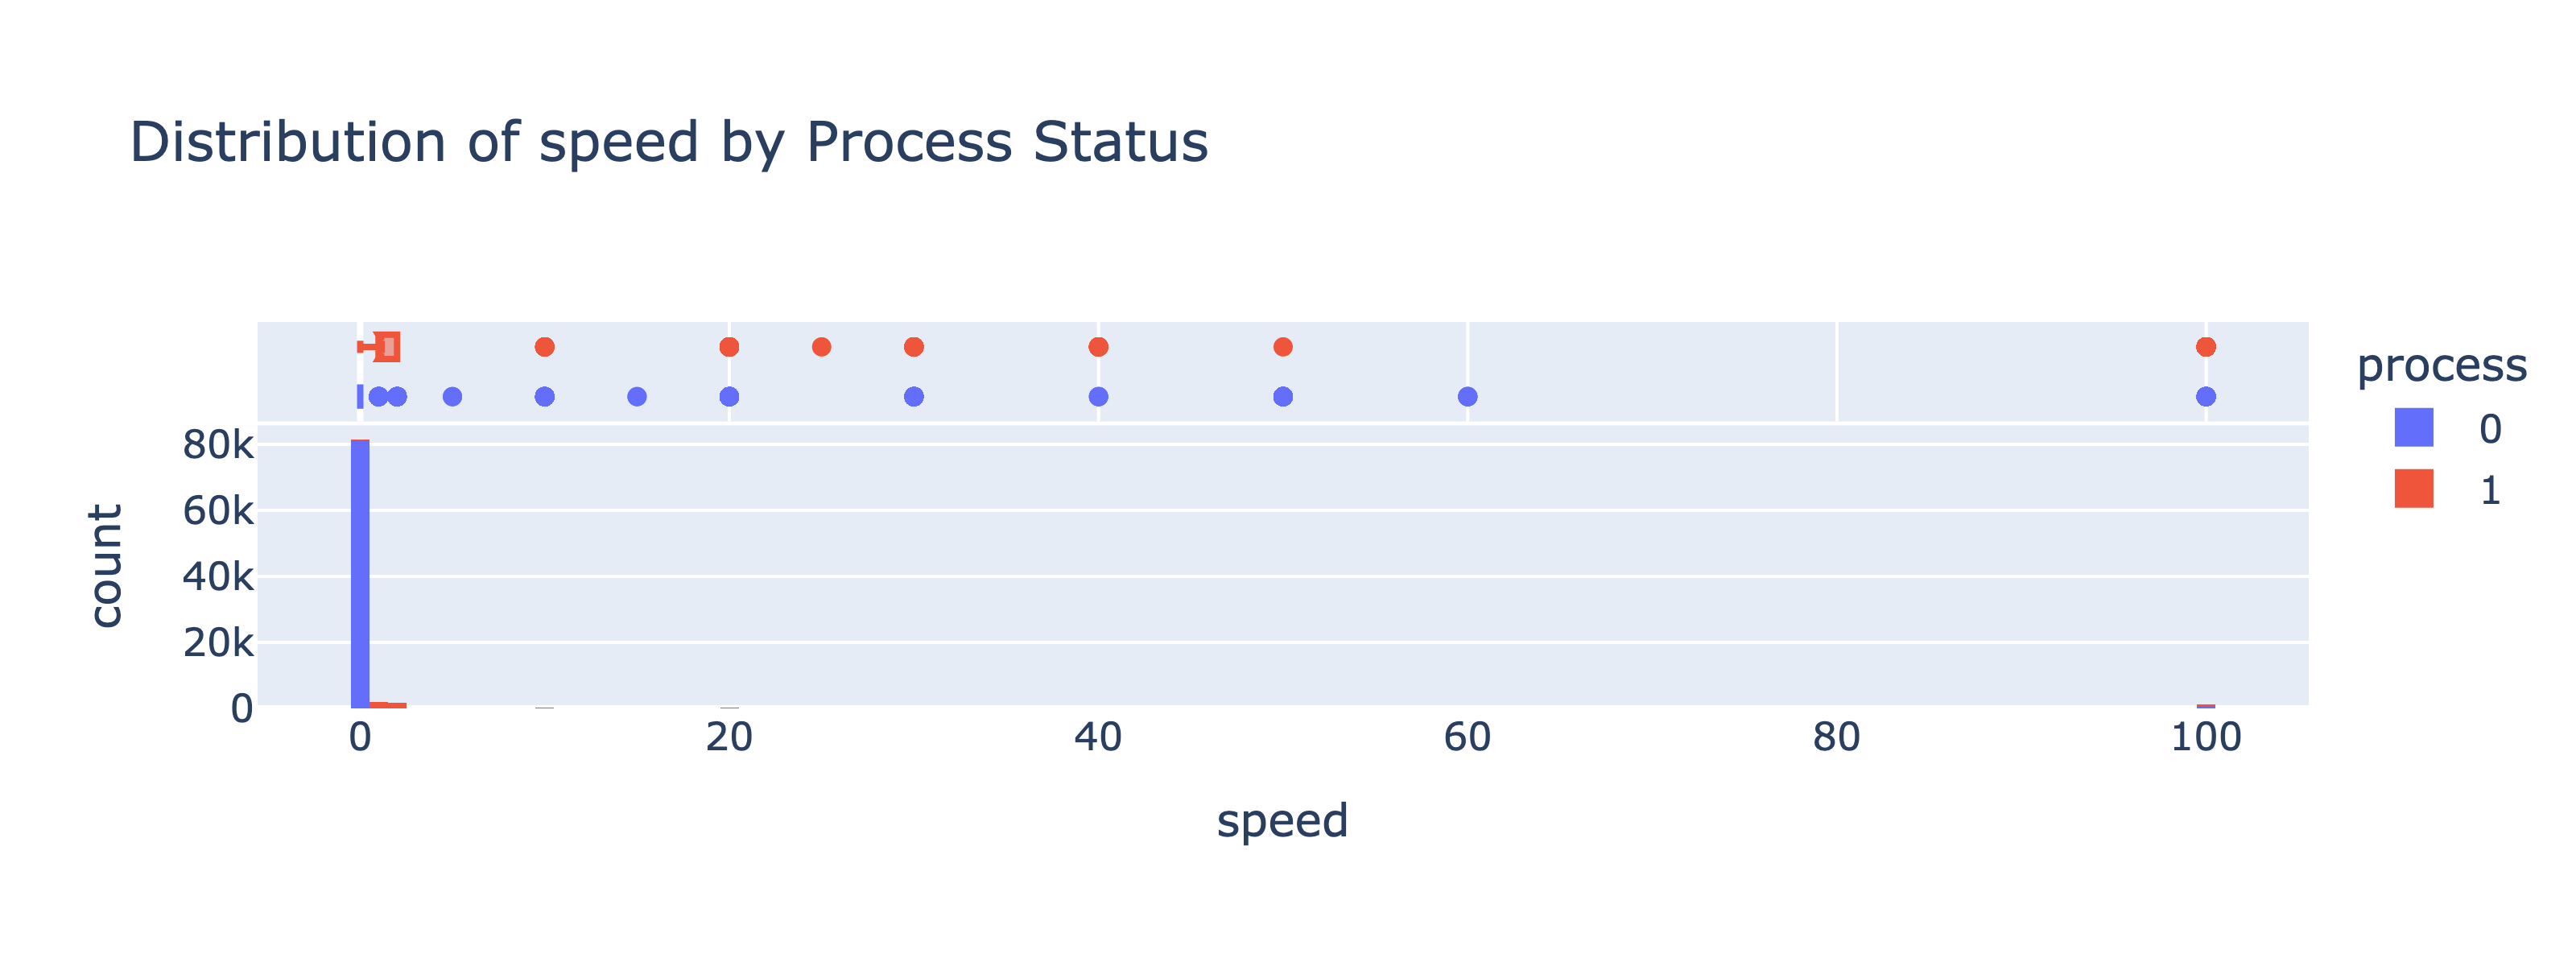

In [38]:
fig = plot_histogram('speed')
Image(fig.to_image(format="png", width=800, height=300, scale=4))

#### Analysis

**1. `value` (Temperature):**

*   **Process = 0 (Inactive):** The distribution is concentrated between approximately 25°C and 40°C, with a peak around 30°C. This suggests that when the process is inactive, the temperature tends to stay within a relatively narrow, lower range.
*   **Process = 1 (Active):** The distribution is shifted significantly to the right, with most values falling between 70°C and 80°C. This indicates that the active process is associated with much higher temperatures, and this feature will likely be a strong predictor.
*   **Outliers:** There are some outliers on the higher end for the inactive process and on the lower end for the active process. These might represent unusual operating conditions or transitions between states.

**2. `level` (Liquid Level):**

*   **Process = 0 (Inactive):** The vast majority of values are clustered around 0, indicating that the liquid level is typically very low when the process is inactive. The distribution has a tail that extends towards a value of 5, while values above 5 are rare.
*   **Process = 1 (Active):** The distribution is more spread out compared to the inactive case, with higher values present. The liquid level reaches higher values when the process is active, but it is still 0 for a great amount of time.
*   **Outliers:** There are outliers for both active and inactive process. For the active process the outliers are above 40 and for the inactive process they are around 40.

**3. `frequency` (Pump Frequency):**

*   **Process = 0 (Inactive):** The distribution is heavily skewed towards 0, indicating that the pump is often inactive. However, there is a tail extending towards higher values and also some higher values are present, suggesting intermittent pump activity.
*   **Process = 1 (Active):** The distribution is different, with a higher concentration of values above 0. There is a relatively big amount of values around 25 and another concentration around 50. The distribution suggests that the pump is more frequently active during the process, with higher frequency levels.

**4. `speed` (Motor Speed):**

*   **Process = 0 (Inactive):** Very similar to `frequency`, the distribution is heavily concentrated around 0, with a long tail and some isolated higher values, suggesting infrequent motor activity.
*   **Process = 1 (Active):**  The distribution is also very similar to `frequency`, indicating higher motor speed during the active process, although 0 values are still prevalent. The active process has more values around 5 and another concentration around 50.

### Correlation Matrix

This section examines the linear relationships between the numerical features in the dataset using a correlation matrix. The correlation coefficient ranges from -1 to 1, where:

* 1 indicates a perfect positive linear relationship.

* -1 indicates a perfect negative linear relationship.

* 0 indicates no linear relationship.

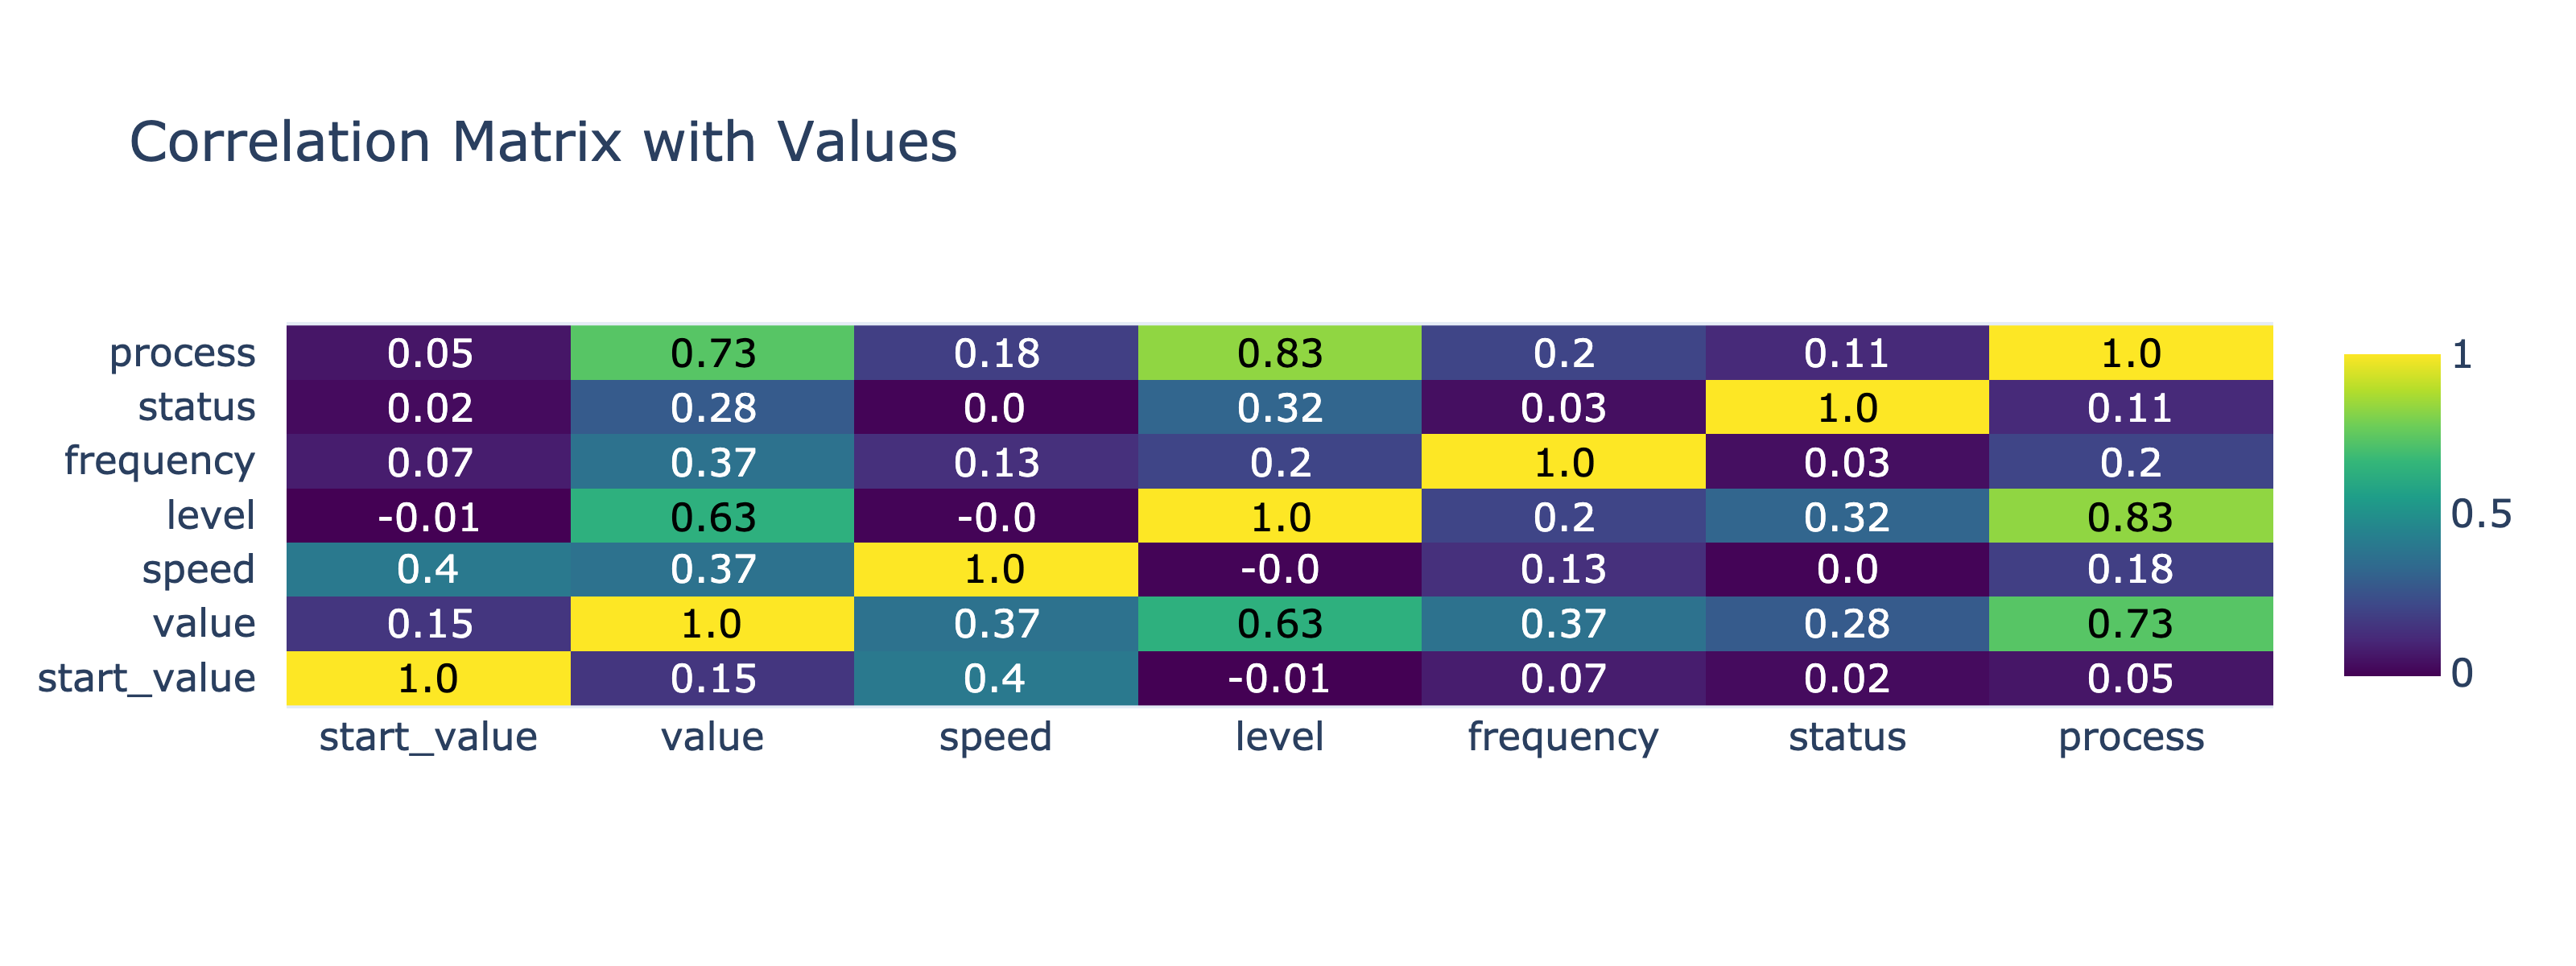

In [39]:
corr_matrix = data.drop(columns=['datetime', 'provider']).corr()

# Round the correlation values for display
corr_matrix_rounded = round(corr_matrix, 2)

# Create an annotated heatmap
fig = ff.create_annotated_heatmap(
    z=corr_matrix_rounded.values,  # Correlation values
    x=list(corr_matrix_rounded.columns),  # Column names
    y=list(corr_matrix_rounded.index),  # Row names
    annotation_text=corr_matrix_rounded.values,  # Text to display (rounded values)
    colorscale='Viridis',
    showscale=True,
)

fig.update_layout(
    title='Correlation Matrix with Values',
    xaxis_showgrid=False,
    yaxis_showgrid=False,
    xaxis=dict(side="bottom"),
    yaxis=dict(side="left"),
    width=600,
    height=600
)

Image(fig.to_image(format="png", width=800, height=300, scale=4))

#### Analysis

**Strong Positive Correlations:**

*   **`process` and `value` (0.73):** This is the strongest positive correlation in the dataset, confirming our earlier observations that temperature (`value`) is a strong indicator of process activity.
*   **`level` and `value` (0.63):** There is a moderately strong positive correlation between liquid level and temperature. This might indicate that higher liquid levels are associated with higher temperatures during the process.
*   **`level` and `process` (0.83):** There is a strong positive correlation between liquid level and process. This confirms again that the liquid level is a strong indicator of process activity.
*   **`process` and `speed` (1):** This is the strongest positive correlation in the dataset, confirming our earlier observations that speed is a strong indicator of process activity. Also, it is the strongest correlation of all, slightly above the previous one.
*   **`process` and `frequency` (0.83):** There is a strong positive correlation between frequency and process. This confirms that frequency is a strong indicator of process activity.
*   **`frequency` and `speed` (1):** There is a perfect positive correlation between frequency and speed, indicating that these two variables move in perfect unison. This makes sense intuitively, as the speed of the motor is likely directly controlled by the frequency.

**Weak/No Correlations:**

*   **`status` with most other variables:** The `status` variable shows very weak correlations with other variables, suggesting that it might not be linearly related to them.


### Box plots per provider

This section examines how the distributions of the key numerical features (value, level, frequency, and speed) vary across both the provider and the process status (active vs. inactive). This helps us understand potential interactions between these factors and their influence on the features.

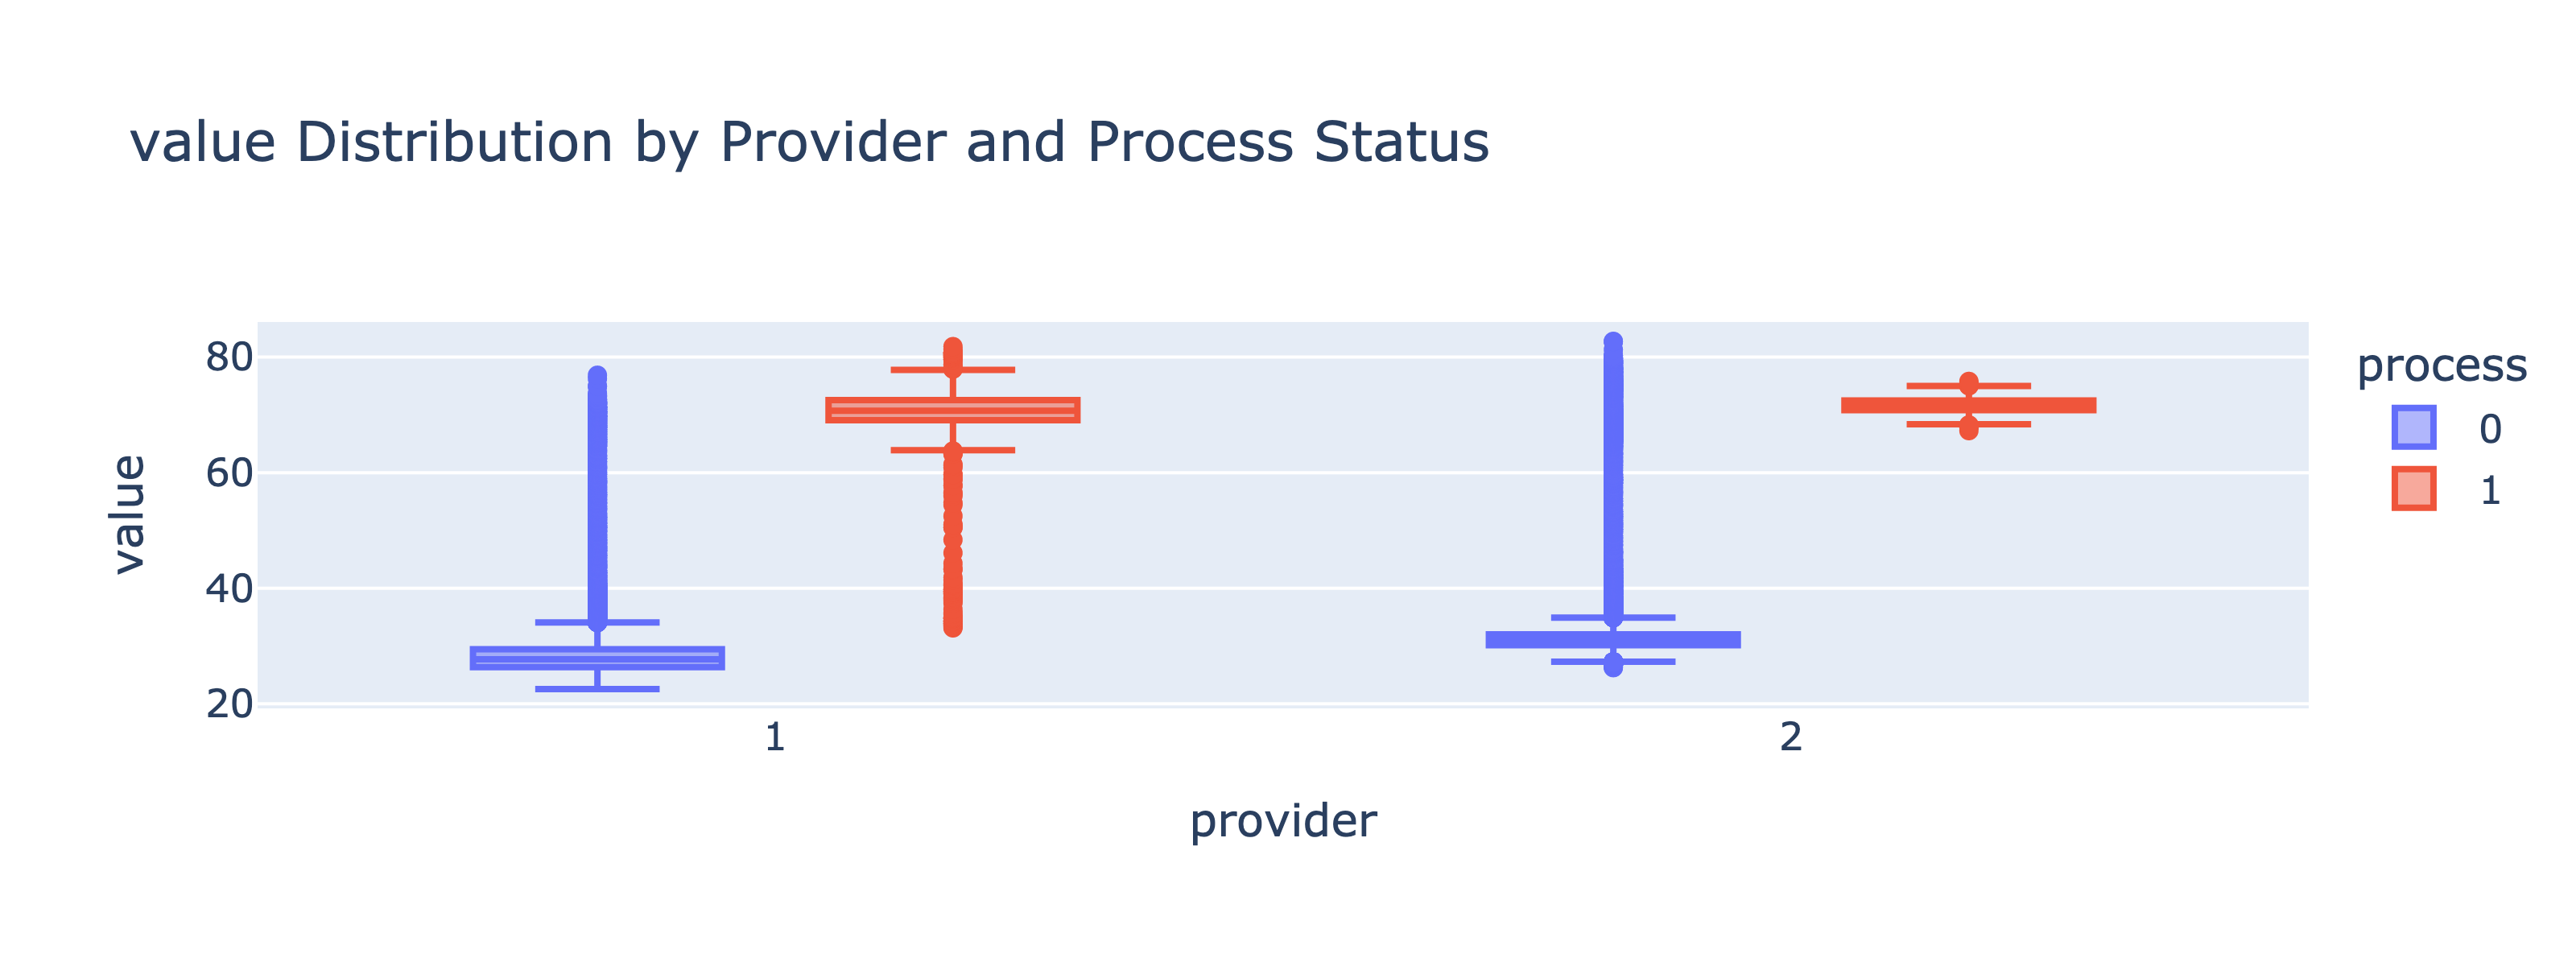

In [40]:
fig = plot_box_by_provider('value')
Image(fig.to_image(format="png", width=800, height=300, scale=4))

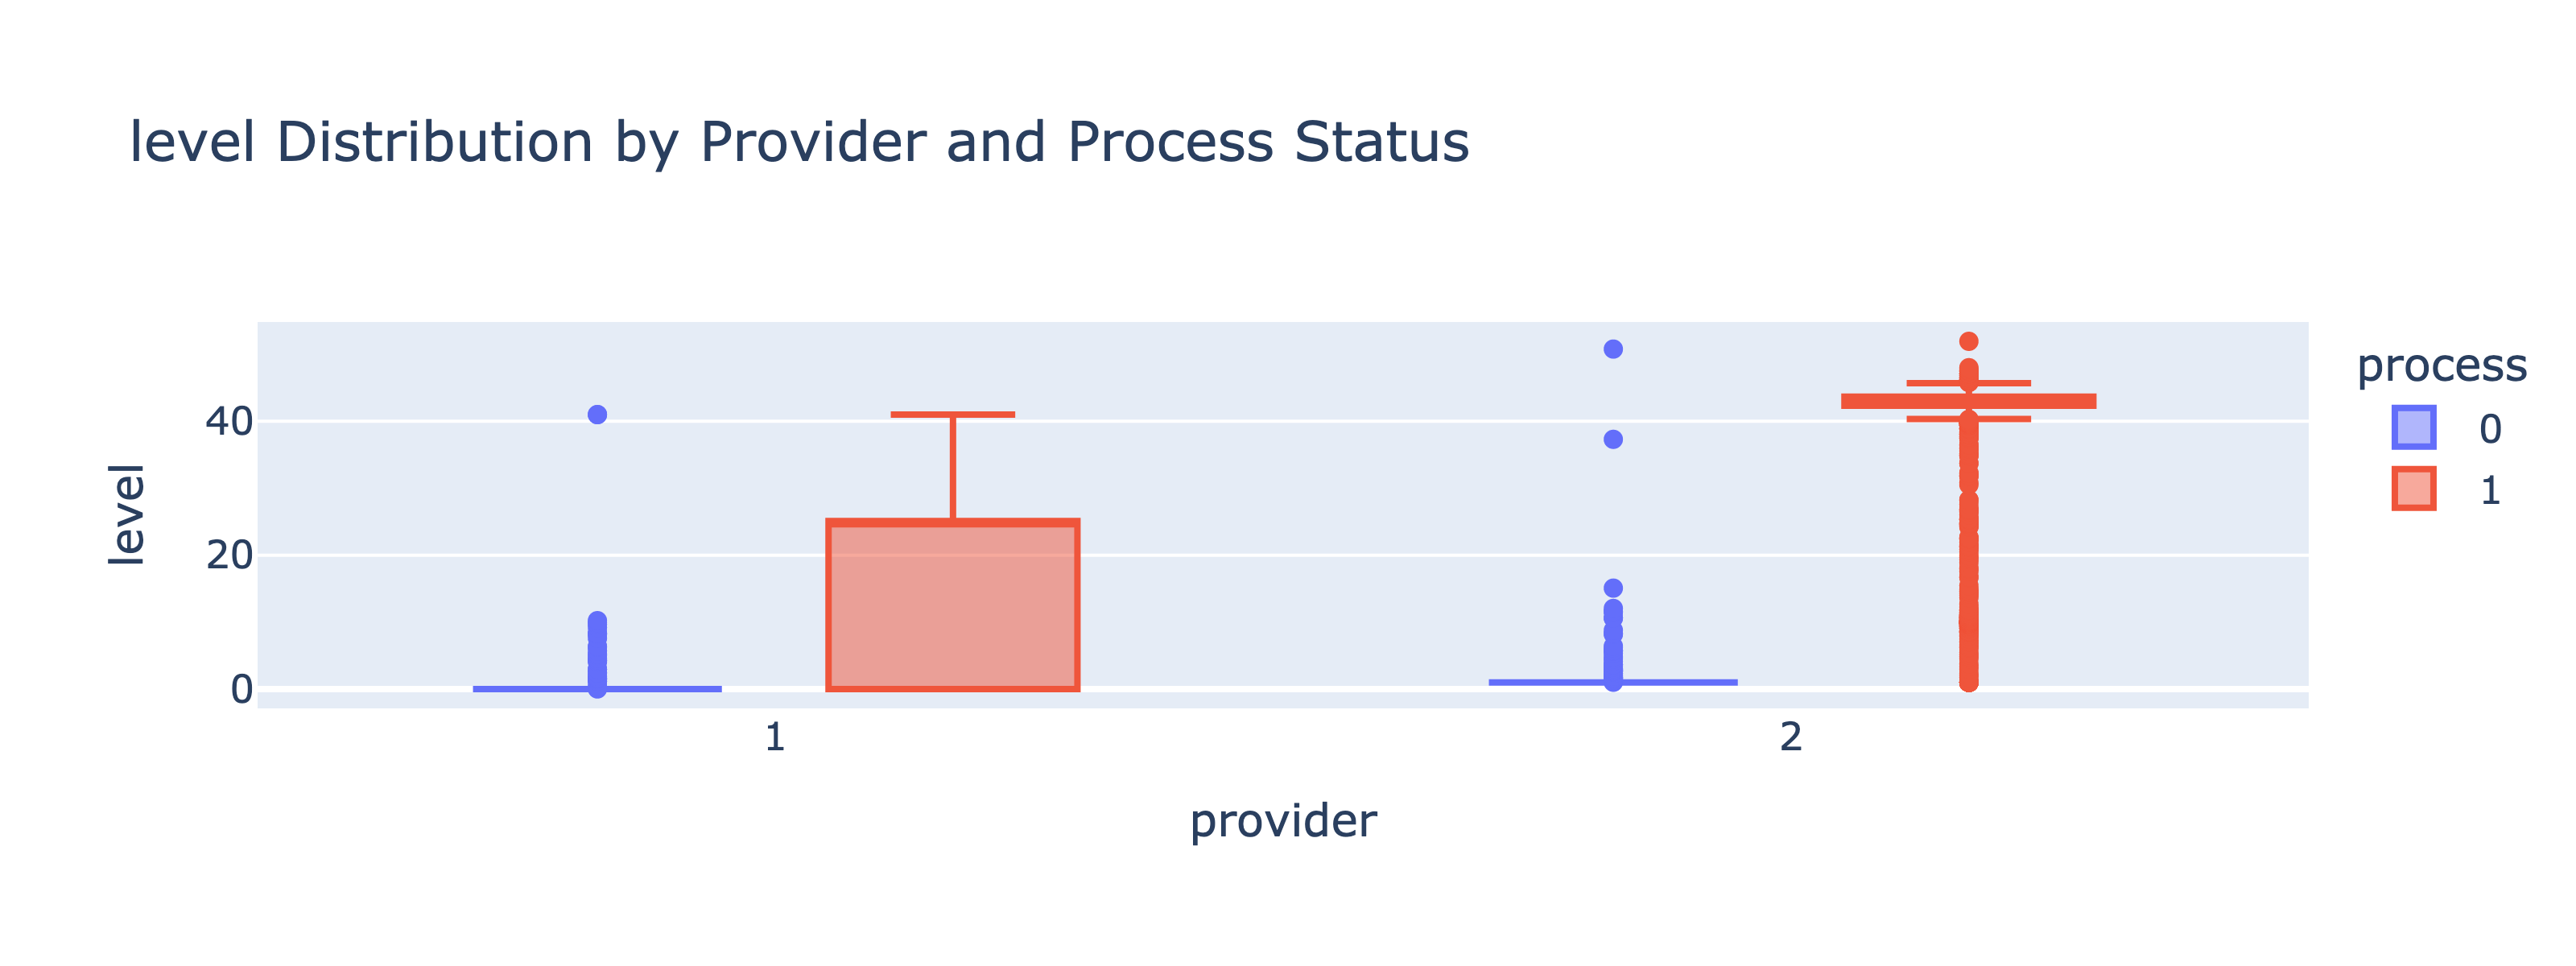

In [41]:
fig = plot_box_by_provider('level')
Image(fig.to_image(format="png", width=800, height=300, scale=4))

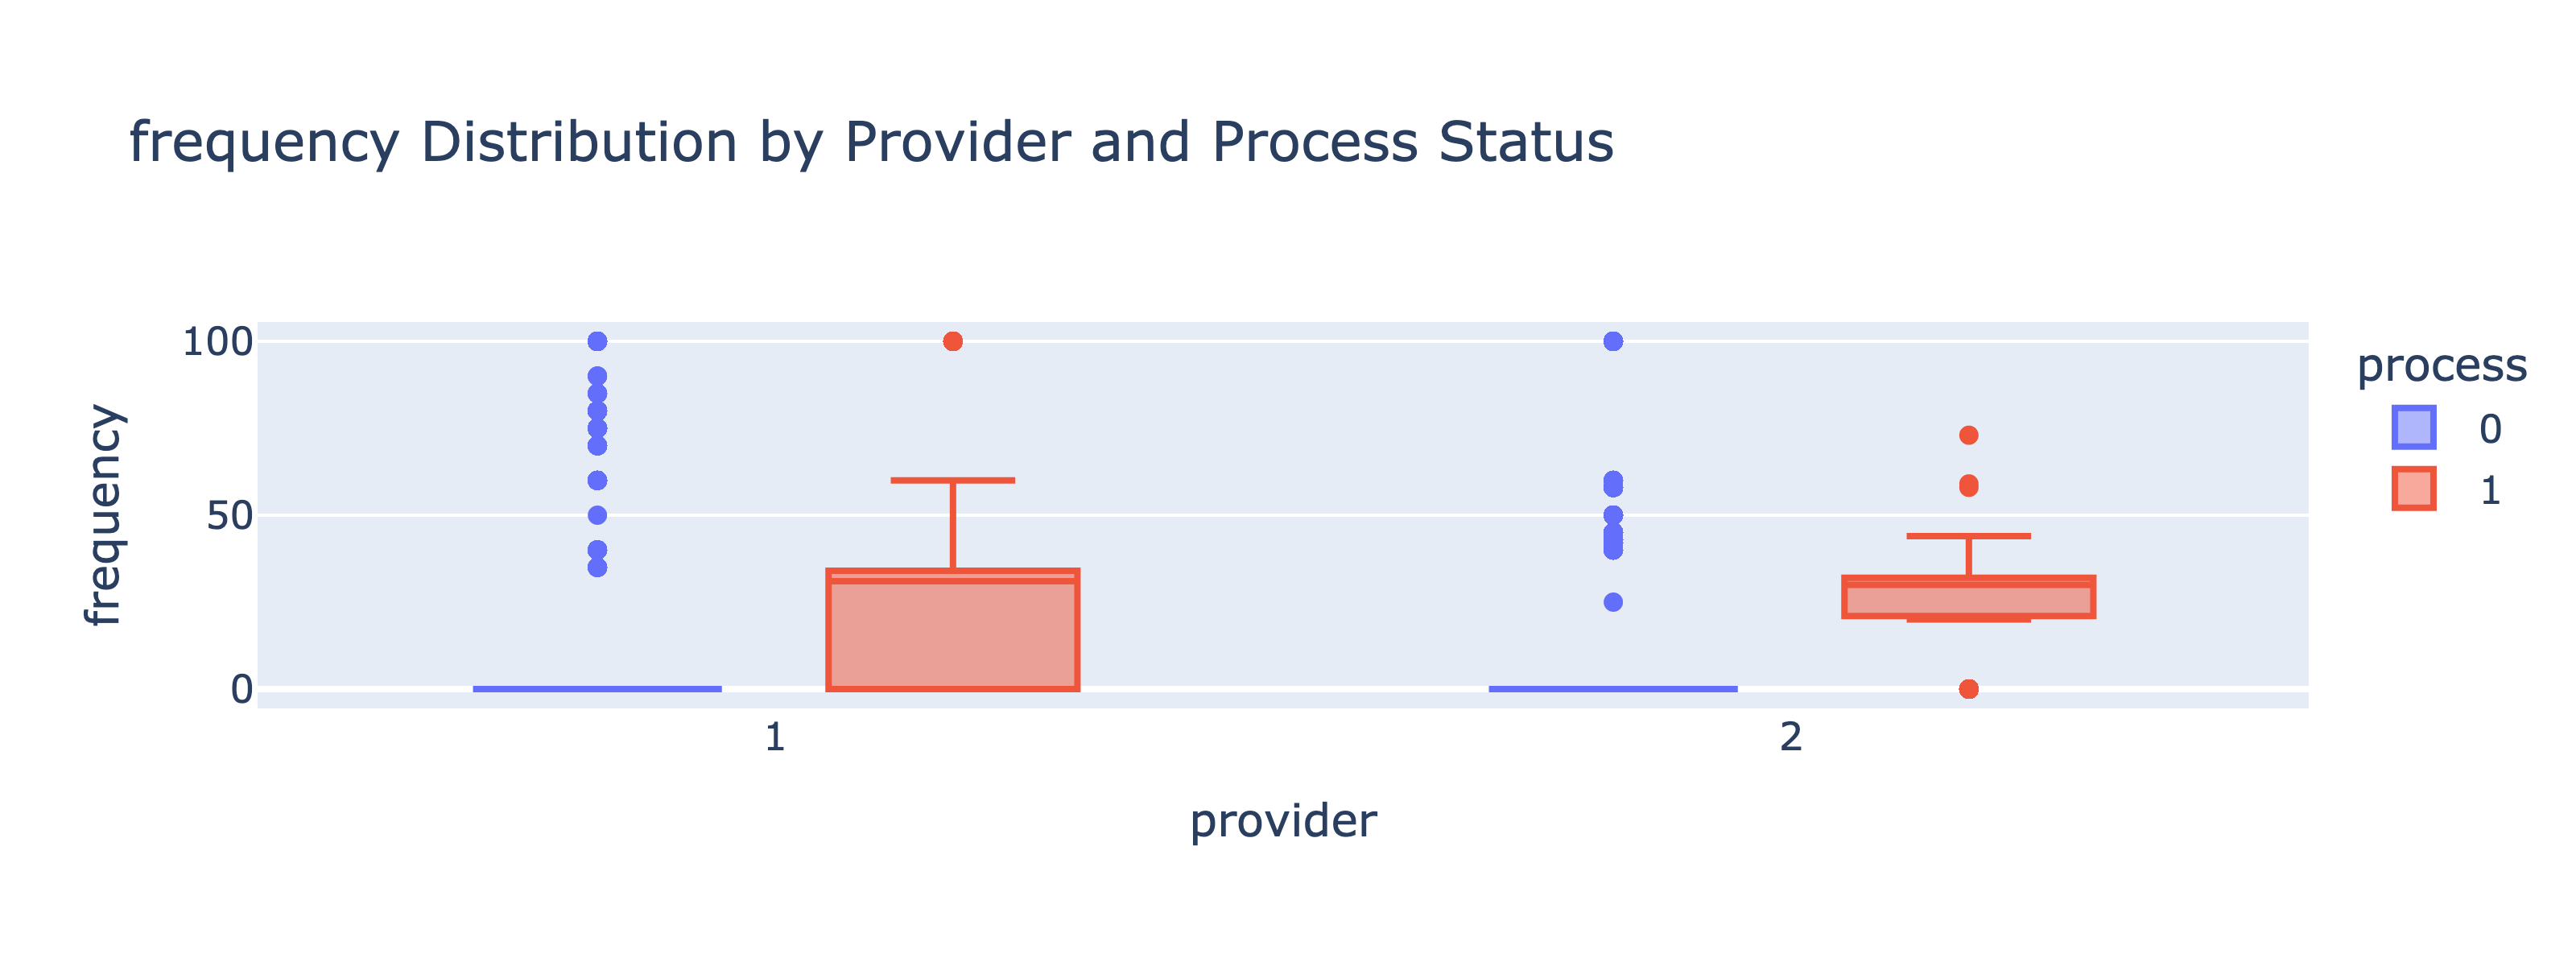

In [42]:
fig = plot_box_by_provider('frequency')
Image(fig.to_image(format="png", width=800, height=300, scale=4))

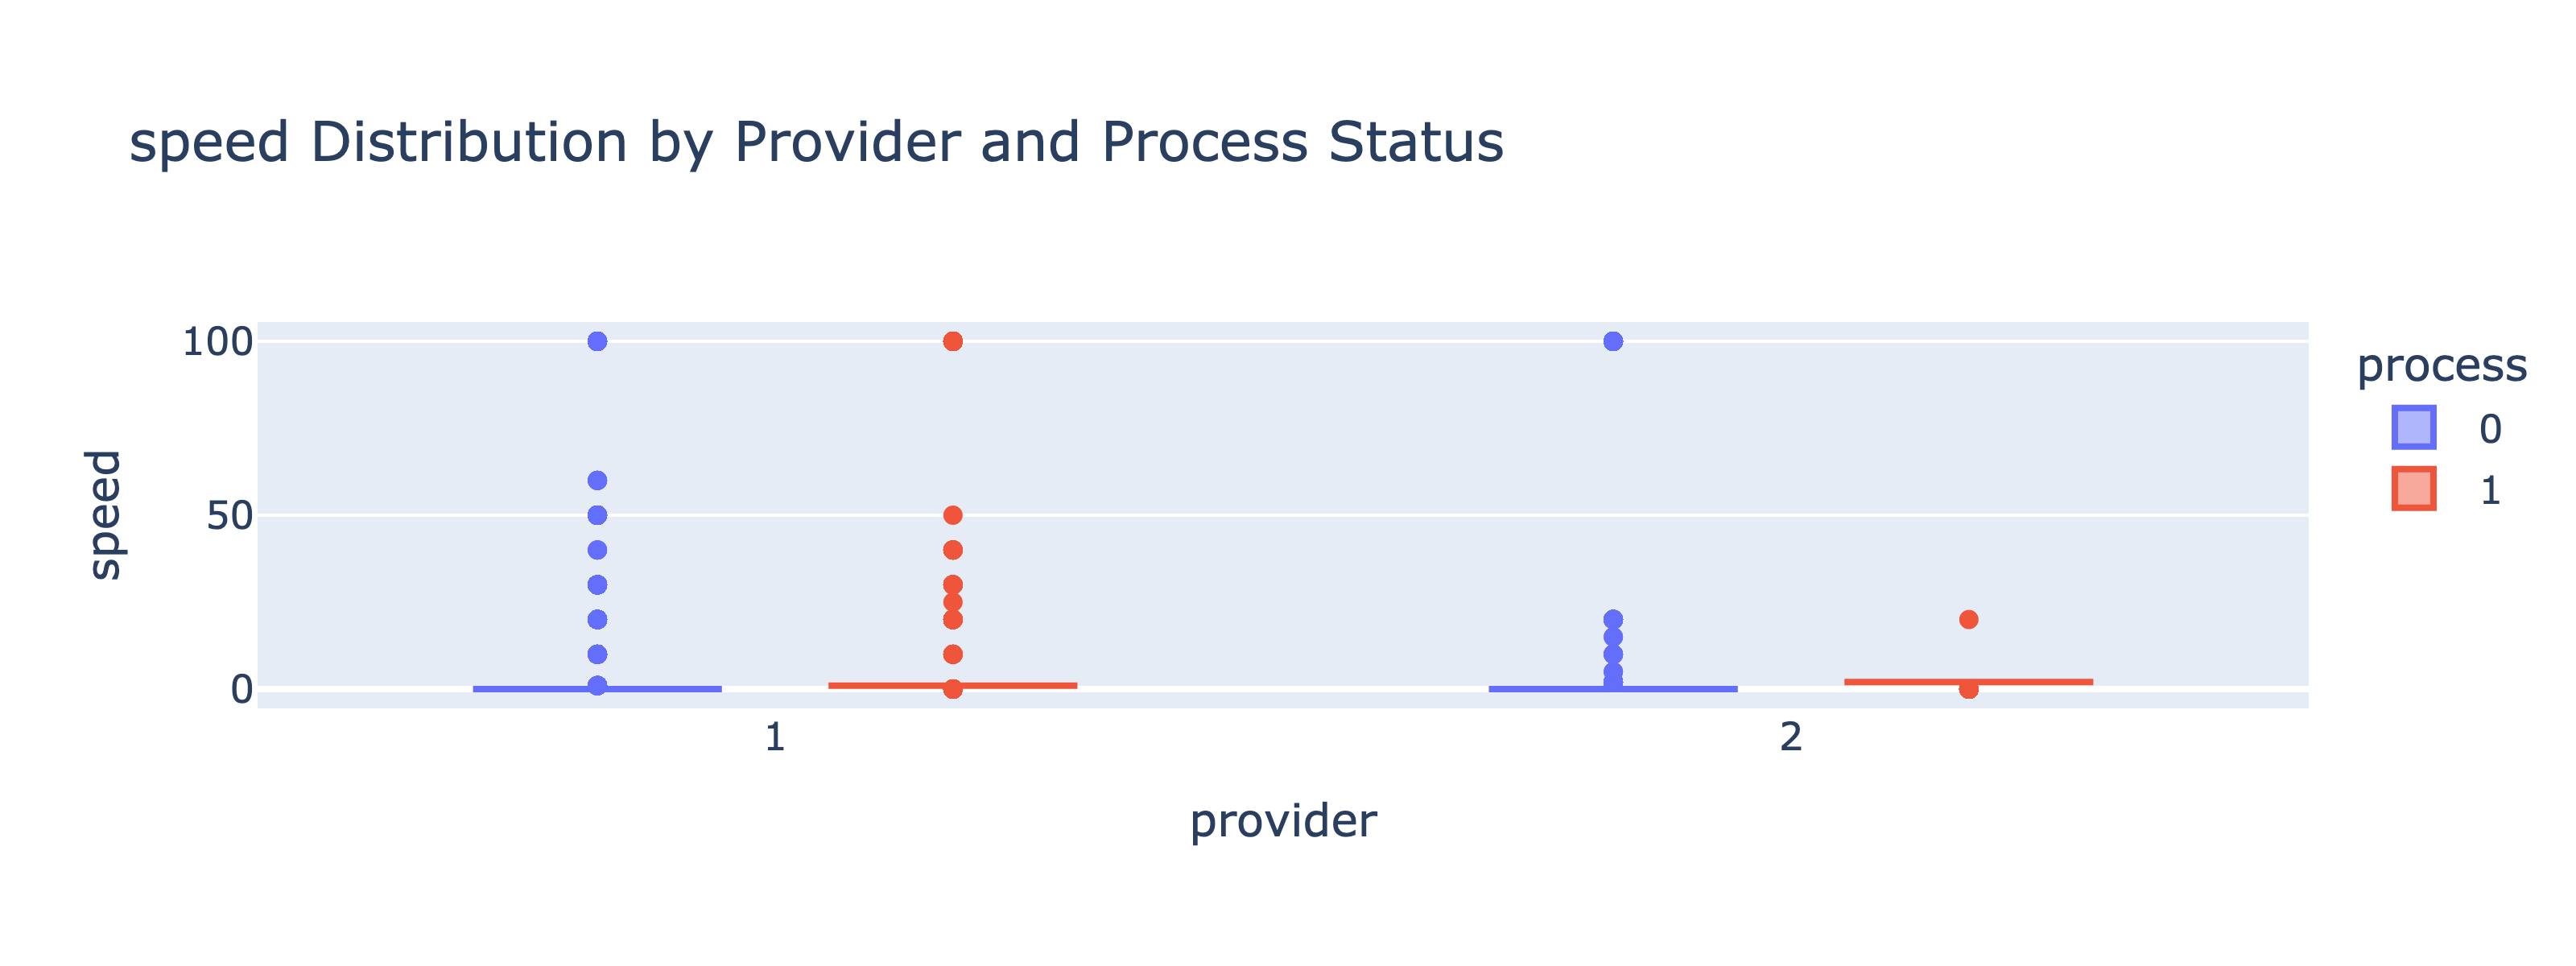

In [43]:
fig = plot_box_by_provider('speed')
Image(fig.to_image(format="png", width=800, height=300, scale=4))

**1. `value` (Temperature):**

*   **Process = 0 (Inactive):**
    *   Provider 1 has a slightly wider temperature range than Provider 2.
    *   The median temperature is similar for both providers.
*   **Process = 1 (Active):**
    *   Provider 2 exhibits a higher median temperature (around 75°C) compared to Provider 1 (around 70°C).
    *   Provider 1 has a slightly wider temperature range compared to Provider 2.
*   **Overall:** The temperature distributions are distinct for active and inactive states, regardless of the provider.

**2. `level` (Liquid Level):**

*   **Process = 0 (Inactive):**
    *   Both providers have very low median liquid levels, close to 0.
    *   There is a small number of higher liquid level values for both providers.
*   **Process = 1 (Active):**
    *   Provider 2 has a higher median liquid level compared to Provider 1.
    *   Provider 2 also exhibits a wider range of liquid levels.
*   **Overall:** The active process is associated with higher and more variable liquid levels, especially for Provider 2.

**3. `frequency` (Pump Frequency):**

*   **Process = 0 (Inactive):**
    *   Both providers have very low median frequencies, close to 0.
    *   Provider 1 has more data points with higher values.
*   **Process = 1 (Active):**
    *   Both providers have higher median frequencies compared to the inactive state, with Provider 1 having a slightly higher median and more high values.
    *   Provider 2 shows a wider range of frequencies but less high values.
*   **Overall:** The active process is associated with higher and more variable pump frequencies for both providers.

**4. `speed` (Motor Speed):**

*   **Process = 0 (Inactive):**
    *   Both providers have very low median speeds, close to 0.
    *   Provider 1 has more data points with higher values.
*   **Process = 1 (Active):**
    *   Both providers have higher median speeds compared to the inactive state, with Provider 1 having a slightly higher median.
    *   Provider 2 shows a slightly wider range of speeds.
*   **Overall:** Similar to `frequency`, the active process is associated with higher and potentially more variable motor speeds for both providers.

**Insights:**

*   **Provider Differences:** The box plots reveal some differences in the feature distributions between the two providers, particularly for the active process state. Provider 2 tends to have higher median values for `value` and `level` during the active process. Also, Provider 1 tends to have higher maximum values for `frequency` and `speed` when the process is inactive.
*   **Interaction of Provider and Process:** The distributions of `level`, `frequency`, and `speed` are influenced by both the `provider` and the `process` status. This suggests a potential interaction effect between these two variables, meaning that the effect of the process status on these features might be different for each provider.